# 2000 year reconstructions: Brennan et al 2020 comparison

July 2020  
Katie Brennan  

In [1]:
import sys,os,copy

In [2]:
import sys
import numpy as np
import pickle

from scipy import stats
from scipy import signal

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point

In [3]:
sys.path.insert(1,'/home/disk/p/mkb22/Documents/si_analysis_kb/instrumental_assimilation_experiments/')
import reanalysis_recons_utils as rrutils

sys.path.insert(1,'/home/disk/p/mkb22/Documents/si_utils_kb/')
import Sice_utils as siutils 

sys.path.insert(1,'/home/disk/p/mkb22/Documents/si_analysis_kb/common_era_experiments/')
import commonera_utils as ce_utils 

Loading information from datasets.yml
Loading information from grid_def.yml
Loading information from datasets.yml
Loading information from grid_def.yml


In [4]:
import importlib
# #importlib.reload(LMRlite)
# #importlib.reload(LMR_config)
# importlib.reload(LMRlite)
importlib.reload(ce_utils)

<module 'commonera_utils' from '/home/disk/p/mkb22/Documents/si_analysis_kb/common_era_experiments/commonera_utils.py'>

In [5]:
plt.rcParams['figure.dpi']=500

In [6]:
 def load_bren2020_full(): 
    data_dir = '/home/disk/p/mkb22/Documents/si_analysis_kb/instrumental_assimilation_experiments/Brennan_etal_2020/data/'
    filename = 'Brennan_etal_2020_sie_recons.nc'

    import xarray as xr

    data_bren2020 = xr.open_dataset(data_dir+filename)
    
    return data_bren2020

def load_bren2020_data(mod_list,temp_list):
    """INPUTS:
       mod_list = list of strings, all caps (ex: ['MPI','CCSM4'])
       temp_list = list of temperature datasets (ex: ['HadCRUT4','Berkeley_Earth','GISTEMP'])
    """
    data_bren2020 = load_bren2020_full()
    sie_bren2020 = {}
    sie_97_5_bren2020 = {}
    sie_2_5_bren2020 = {}
    
    for m in mod_list: 
        for d in temp_list: 
            sie_name = 'sie_'+m+'_'+d
            bren2020_time = data_bren2020[sie_name][d+'_time'].values
            sie_bren2020[sie_name] = np.nanmean(np.reshape(data_bren2020[sie_name].values,(169,1000)),axis=1)
            sie_97_5_bren2020[sie_name+'_97_5'] = data_bren2020[sie_name+'_97_5'].values
            sie_2_5_bren2020[sie_name+'_2_5'] = data_bren2020[sie_name+'_2_5'].values
            
    return bren2020_time, sie_bren2020, sie_97_5_bren2020, sie_2_5_bren2020

In [7]:
def sub_arctic_plot(fig,ax,VAR1,LAT,LON,TITLE1,MAX1,colorbar=True,extent=True):
    var1, lon1 = add_cyclic_point(VAR1, coord=LON)
    new_lon2d, new_lat2d = np.meshgrid(lon1, LAT)
    if extent is True: 
        ax.set_extent([-150, 140, 50, 90], crs=ccrs.PlateCarree())
    ax.gridlines(linestyle='--')
    ax.add_feature(cfeature.LAND, facecolor=(1, 1, 1))
    cs = ax.pcolormesh(new_lon2d, new_lat2d, var1, 
                       vmin=-MAX1, vmax=MAX1, cmap=plt.cm.RdBu_r, 
                       transform=ccrs.PlateCarree())
    ax.coastlines(resolution='110m', linewidth=0.5)
    if colorbar is True:
        plt.colorbar(cs, ax=ax)
    ax.set_title(TITLE1)

In [8]:
def load_recon_grid(): 
    lalo_dir = '/home/disk/p/mkb22/nobackup/LMR_output/common_era_experiments/experiments/'
    lalo_savename = '20CR_grid.pkl'

    grid = pickle.load(open(lalo_dir+lalo_savename,'rb'))
    
    return grid

In [9]:
proj = dict(projection=ccrs.Stereographic(central_latitude=90,
                                          central_longitude=-45,
                                          true_scale_latitude=0.1))

In [10]:
output_dir_ccsm4 = '/home/disk/p/mkb22/nobackup/LMR_output/common_era_experiments/experiments/ccsm4/'
output_file_ccsm4 = 'sic_ccsm4_anrecon_0_2000_pages2kv2_inf2_6_loc15000_iter0.pkl'

niter = 10

[sic_lalo_allit_ccsm4, tas_lalo_allit_ccsm4, sic_ens_var_allit_ccsm4, 
 nobs_allit_ccsm4, sia_ens_allit_ccsm4, sie_ens_allit_ccsm4, Ye_assim_allit_ccsm4, 
 Ye_assim_coords_allit_ccsm4, Xb_inflate_allit_ccsm4, recon_years, 
 proxy_assim_loc_allit_ccsm4] = ce_utils.load_recon_allit(output_dir_ccsm4,output_file_ccsm4,niter)

In [11]:
output_dir_mpi = '/home/disk/p/mkb22/nobackup/LMR_output/common_era_experiments/experiments/mpi/'
output_file_mpi = 'sic_mpi_anrecon_0_2000_pages2kv2_inf1_8_loc15000_iter0.pkl'

[sic_lalo_allit_mpi, tas_lalo_allit_mpi, sic_ens_var_allit_mpi, 
 nobs_allit_mpi, sia_ens_allit_mpi, sie_ens_allit_mpi, Ye_assim_allit_mpi, 
 Ye_assim_coords_allit_mpi, Xb_inflate_allit_mpi, recon_years, 
 proxy_assim_loc_allit_mpi] = ce_utils.load_recon_allit(output_dir_mpi,output_file_mpi,niter)

In [12]:
anom_start = 1979
anom_end = 2000

In [13]:
# LOAD BRENNAN ET AL 2020 DATA: 
[bren2020_time, sie_bren2020, 
 sie_97_5_bren2020, sie_2_5_bren2020] = load_bren2020_data(['CCSM4','MPI'],['HadCRUT4'])

# adjust anomalies: 
time_inds = np.where((bren2020_time<anom_end)&(bren2020_time>anom_start-1))

sie_bren2020['sie_MPI_HadCRUT4_anom'] = (sie_bren2020['sie_MPI_HadCRUT4']-
                                         np.nanmean(sie_bren2020['sie_MPI_HadCRUT4'][time_inds]))
sie_bren2020['sie_CCSM4_HadCRUT4_anom'] = (sie_bren2020['sie_CCSM4_HadCRUT4']-
                                           np.nanmean(sie_bren2020['sie_CCSM4_HadCRUT4'][time_inds]))
sie_MPI_HadCRUT4_97_5_anom = (sie_97_5_bren2020['sie_MPI_HadCRUT4_97_5']-
                              np.nanmean(sie_bren2020['sie_MPI_HadCRUT4'][time_inds]))
sie_CCSM4_HadCRUT4_97_5_anom =  (sie_97_5_bren2020['sie_CCSM4_HadCRUT4_97_5']-
                                 np.nanmean(sie_bren2020['sie_MPI_HadCRUT4'][time_inds]))
sie_MPI_HadCRUT4_2_5_anom = (sie_2_5_bren2020['sie_MPI_HadCRUT4_2_5']-
                             np.nanmean(sie_bren2020['sie_MPI_HadCRUT4'][time_inds]))
sie_CCSM4_HadCRUT4_2_5_anom =  (sie_2_5_bren2020['sie_CCSM4_HadCRUT4_2_5']-
                                np.nanmean(sie_bren2020['sie_CCSM4_HadCRUT4'][time_inds]))

In [14]:
# LOAD ANNUAL SATELLITE DATA: 
[fet_sia_anom, fet_sie_anom, fet_time] = rrutils.load_annual_satellite_anom(anom_end)
[fet_sia, fet_sie, fet_time2] = rrutils.load_annual_satellite()

In [15]:
# LOAD ANNUAL WALSH DATA: 
[walsh_sia, walsh_sie, walsh_time] = rrutils.load_annual_walsh()

walsh_sia_anom = rrutils.find_anomalies(walsh_time, walsh_sia, anom_start,anom_end)
walsh_sie_anom = rrutils.find_anomalies(walsh_time, walsh_sie, anom_start,anom_end)

FileNotFoundError: [Errno 2] No such file or directory: '/home/disk/chaos/mkb22/Documents/SeaIceData/Walsh2016/walsh_comparison/Walsh_annual_sie_km2.npz'

In [16]:
# LOAD KINNARD ET AL 2011: 
import pandas as pd

datadir = '/home/disk/chaos/mkb22/Documents/SeaIceData/Kinnard2011/'

filename5 = 'nature10581-s5.csv'
filename4 = 'nature10581-s4.xls'
filename3 = 'nature10581-s3.xls'
filename2 = 'nature10581-s2.xls'

df = pd.read_csv(datadir+filename5, skiprows=26)

df.columns = ['year','Aug_sie_40yr_recon','sie_recon_lower_95',\
              'sie_recon_upper_95','sie_obs_40yr', 'dino_fram_recon',\
              'obs_fram_walsh_2001','dino_chukchi_recon','obs_chukchi_walsh_2001']\
                +list(range(10,18))

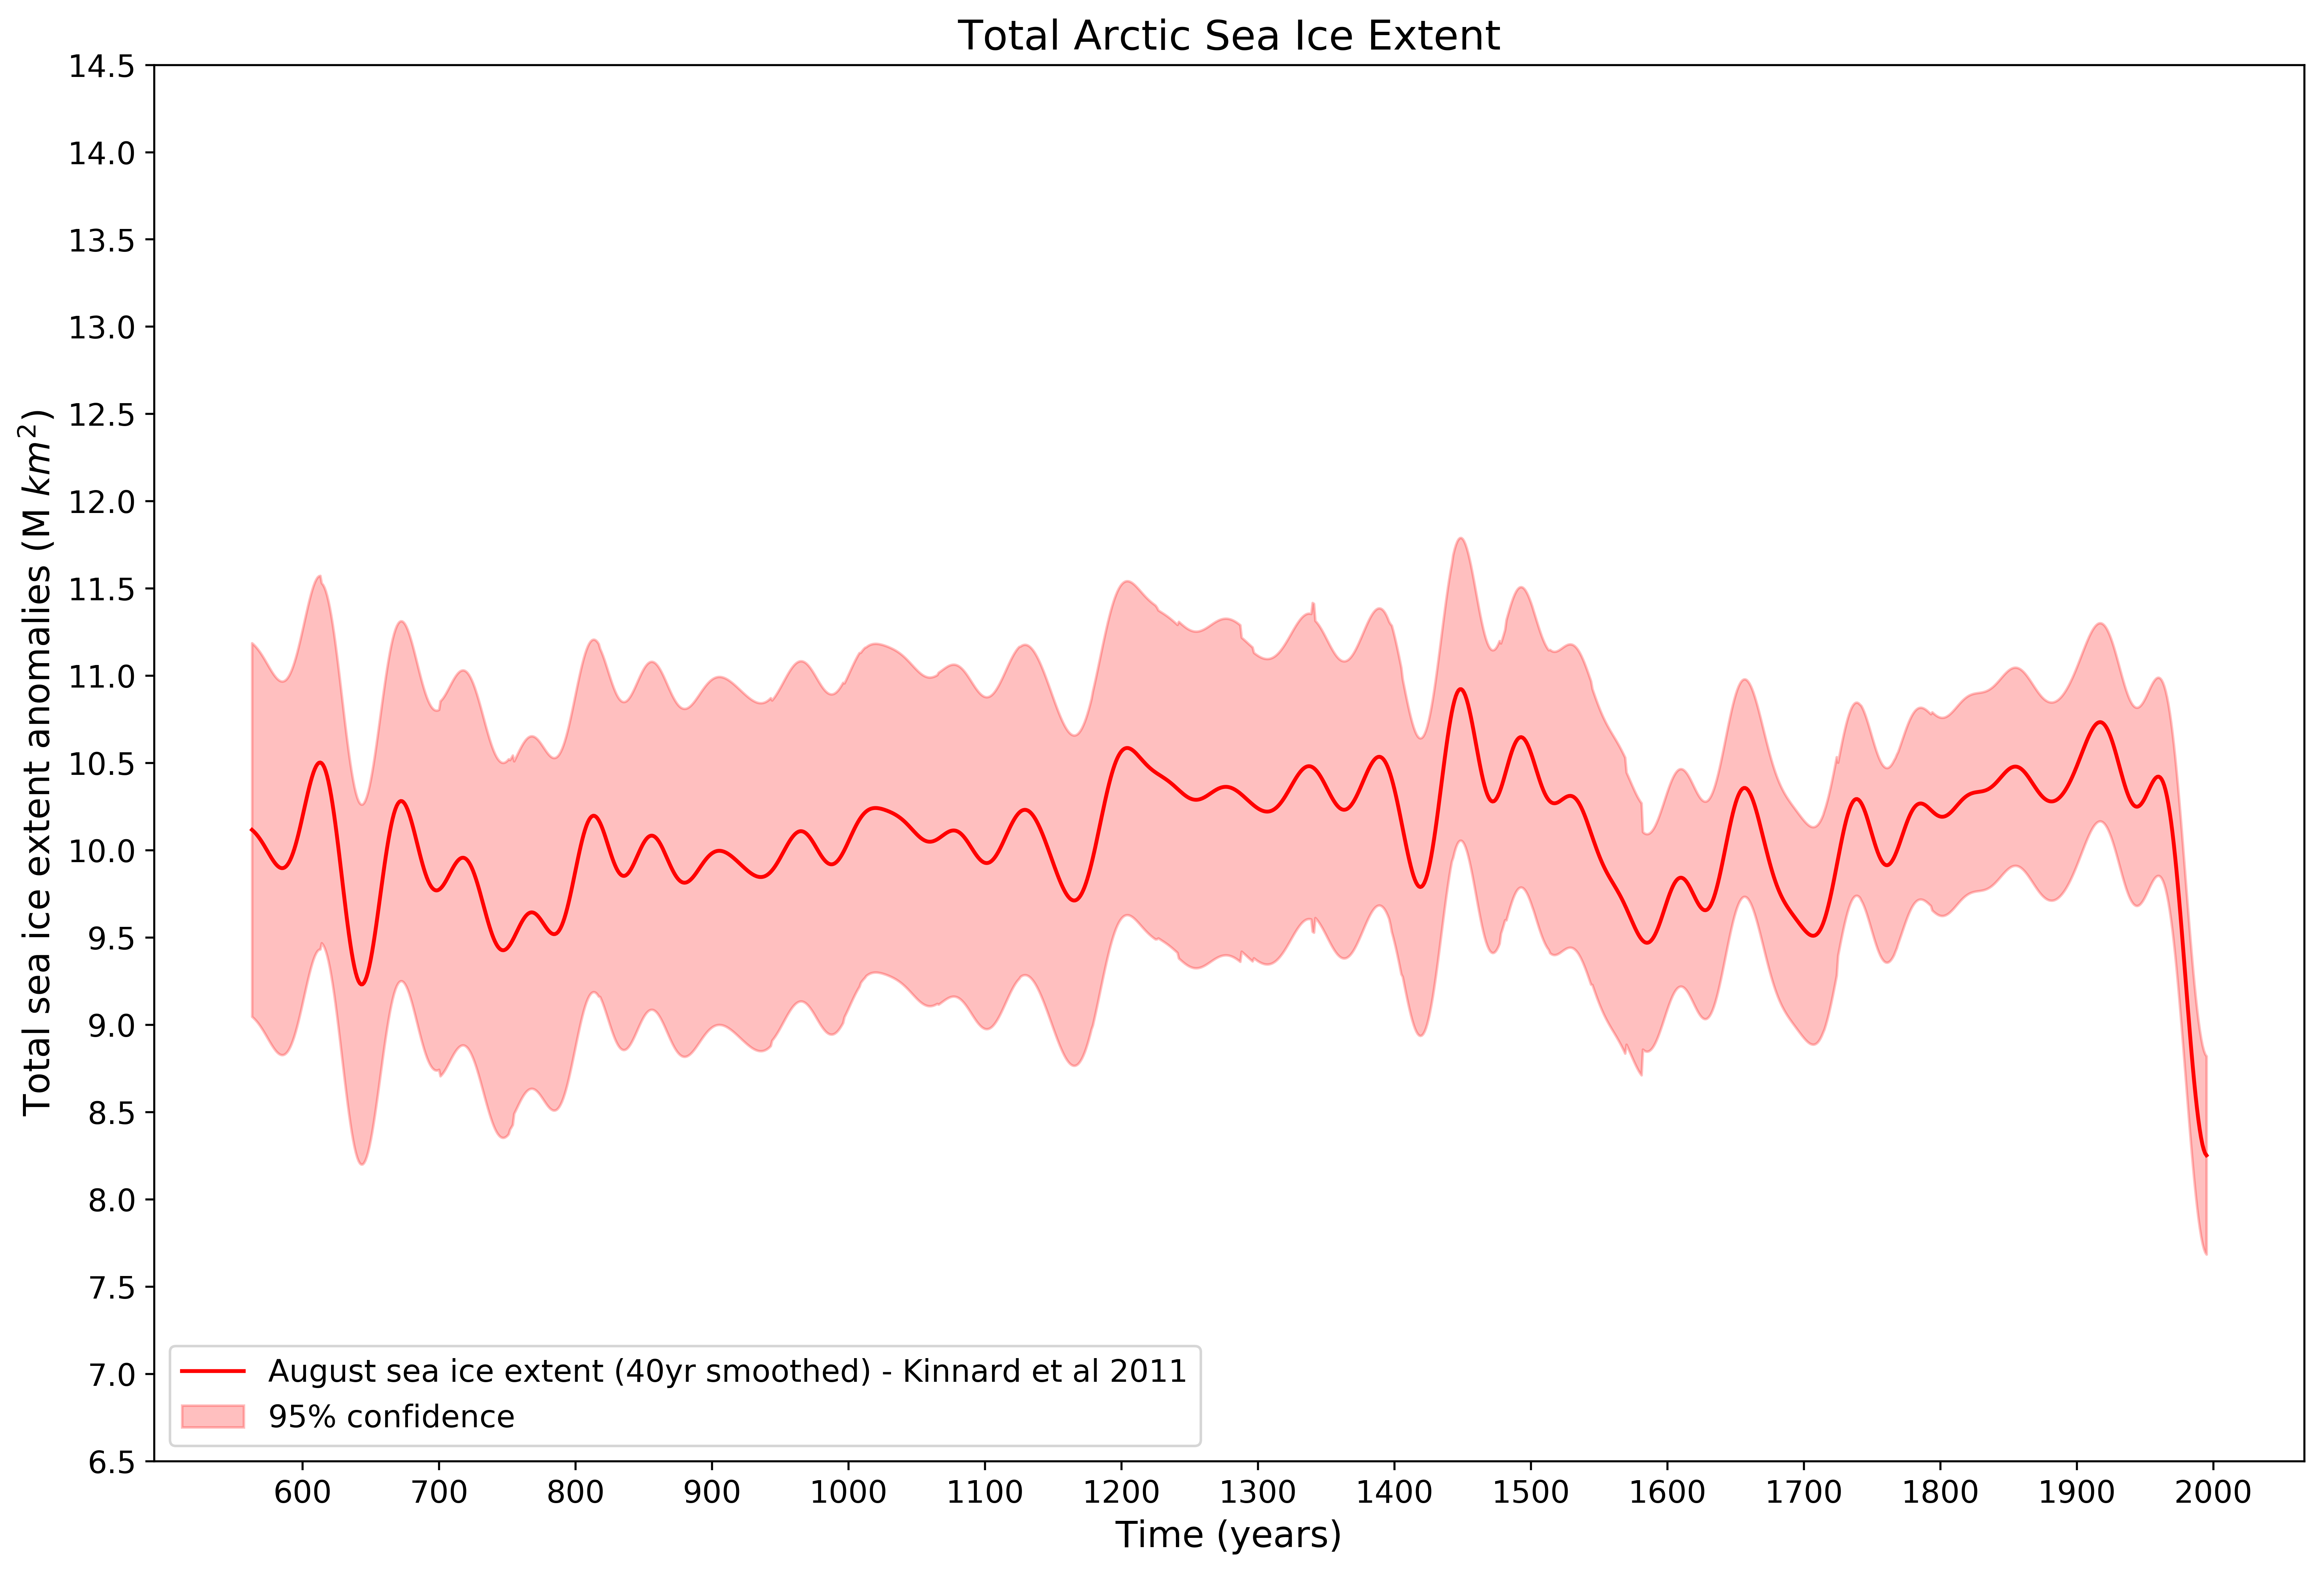

In [17]:
plt.subplots(figsize=(15,10))

plt.fill_between(df['year'][8:1446],df['sie_recon_upper_95'][8:1446]/1000000,
                 df['sie_recon_lower_95'][8:1446]/1000000,\
                 label='95% confidence', color='r',alpha=0.25)
plt.plot(df['year'][8:1446],df['Aug_sie_40yr_recon'][8:1446]/1000000,color='r',
         label='August sea ice extent (40yr smoothed) - Kinnard et al 2011')

plt.xlabel('Time (years)', fontsize=14)
plt.ylabel('Total sea ice extent anomalies (M $km^{2}$)', fontsize=14)
plt.title('Total Arctic Sea Ice Extent', fontsize=16) 

plt.yticks(np.arange(6.5, 15, 0.5), fontsize=12)
plt.xticks(np.arange(600, 2001,100), fontsize=12)


plt.legend(loc = 'lower left', fontsize=12)

In [18]:
# Find indices to take anomalies over: 
anom_ind = np.where((np.array(recon_years)<anom_end)&(np.array(recon_years)>=anom_start))

In [19]:
sie_ens_allit_2d_ccsm4 = np.reshape(sie_ens_allit_ccsm4,(sie_ens_allit_ccsm4.shape[0],
                                    sie_ens_allit_ccsm4.shape[1]*sie_ens_allit_ccsm4.shape[2]))
sie_ens_anom_allit_ccsm4 = sie_ens_allit_2d_ccsm4 - np.nanmean(np.squeeze(sie_ens_allit_2d_ccsm4[anom_ind,:]),axis=0)
sie_ensmn_anom_allit_ccsm4 = np.nanmean(sie_ens_anom_allit_ccsm4,axis=1)
sie_ensmn_allit_ccsm4_full = np.nanmean(sie_ens_allit_2d_ccsm4,axis=1)

sie_97_5_allit_ccsm4 = np.percentile(sie_ens_anom_allit_ccsm4,97.5,axis=1)
sie_2_5_allit_ccsm4 = np.percentile(sie_ens_anom_allit_ccsm4,2.5,axis=1)

sie_97_5_allit_ccsm4_full = np.percentile(sie_ens_allit_2d_ccsm4,97.5,axis=1)
sie_2_5_allit_ccsm4_full = np.percentile(sie_ens_allit_2d_ccsm4,2.5,axis=1)

[ce_sie_ccsm4,corr_sie_ccsm4,
 var_sie_sat_ccsm4,var_sie_recon_ccsm4] = rrutils.find_ce_corr(sie_ensmn_anom_allit_ccsm4, 
                                                               sie_bren2020['sie_CCSM4_HadCRUT4_anom'],
                                                               bren2020_time,
                                                               np.array(recon_years),1850,1999)

In [20]:
sie_ens_allit_2d_mpi = np.reshape(sie_ens_allit_mpi,(sie_ens_allit_mpi.shape[0],
                                  sie_ens_allit_mpi.shape[1]*sie_ens_allit_mpi.shape[2]))
sie_ens_anom_allit_mpi = sie_ens_allit_2d_mpi - np.nanmean(np.squeeze(sie_ens_allit_2d_mpi[anom_ind,:]),axis=0)
sie_ensmn_anom_allit_mpi = np.nanmean(sie_ens_anom_allit_mpi,axis=1)

sie_97_5_allit_mpi = np.percentile(sie_ens_anom_allit_mpi,97.5,axis=1)
sie_2_5_allit_mpi = np.percentile(sie_ens_anom_allit_mpi,2.5,axis=1)

[ce_sie_mpi,corr_sie_mpi,
 var_sie_sat_mpi,var_sie_recon_mpi] = rrutils.find_ce_corr(sie_ensmn_anom_allit_mpi, 
                                                           sie_bren2020['sie_MPI_HadCRUT4_anom'],
                                                           bren2020_time,
                                                           np.array(recon_years),1850,1999)

In [21]:
p1 = np.percentile(sie_ens_allit_2d_ccsm4,97.5,axis=1)
p2 = np.percentile(sie_ens_allit_2d_ccsm4,2.5,axis=1)

p1_anom = p1 - np.mean(np.mean(sie_ens_allit_2d_ccsm4[anom_ind,:],axis=1),axis=1)
p2_anom = p2 - np.mean(np.mean(sie_ens_allit_2d_ccsm4[anom_ind,:],axis=1),axis=1)

In [54]:
Wn2 = 1.0/20
nf2 = 7
b2,a2 = signal.butter(nf2,Wn2,btype='lowpass')
w2, h2 = signal.freqs(b2, a2)
sie_ccsm4_filt40 = signal.filtfilt(b2,a2,sie_ensmn_anom_allit_ccsm4)
sie_mpi_filt40 = signal.filtfilt(b2,a2,sie_ensmn_anom_allit_mpi)

sie_mpi_low_filt40 = signal.filtfilt(b2,a2,sie_2_5_allit_mpi)
sie_mpi_high_filt40 = signal.filtfilt(b2,a2,sie_97_5_allit_mpi)

sie_ccsm4_low_filt40 = signal.filtfilt(b2,a2,sie_2_5_allit_ccsm4)
sie_ccsm4_high_filt40 = signal.filtfilt(b2,a2,sie_97_5_allit_ccsm4)

/home/disk/chaos/mkb22/anaconda2/envs/lmr_py3_xarray/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


In [47]:
kinnard_year, anom_start, anom_end

(array([2000, 1999, 1998, ...,  565,  564,  563]), 1979, 2000)

In [48]:
kinnard_year = df['year'][8:1446].values
kinnard_sie = df['Aug_sie_40yr_recon'][8:1446].values/1000000
kin_ind = np.where((kinnard_year>=anom_start)&(kinnard_year<=anom_end))

kinnard_sie_anom = kinnard_sie - np.nanmean(kinnard_sie[kin_ind])
kinnard_sie_high_anom = df['sie_recon_upper_95'][8:1446].values/1000000 - np.nanmean(kinnard_sie[kin_ind])
kinnard_sie_low_anom = df['sie_recon_lower_95'][8:1446].values/1000000- np.nanmean(kinnard_sie[kin_ind])

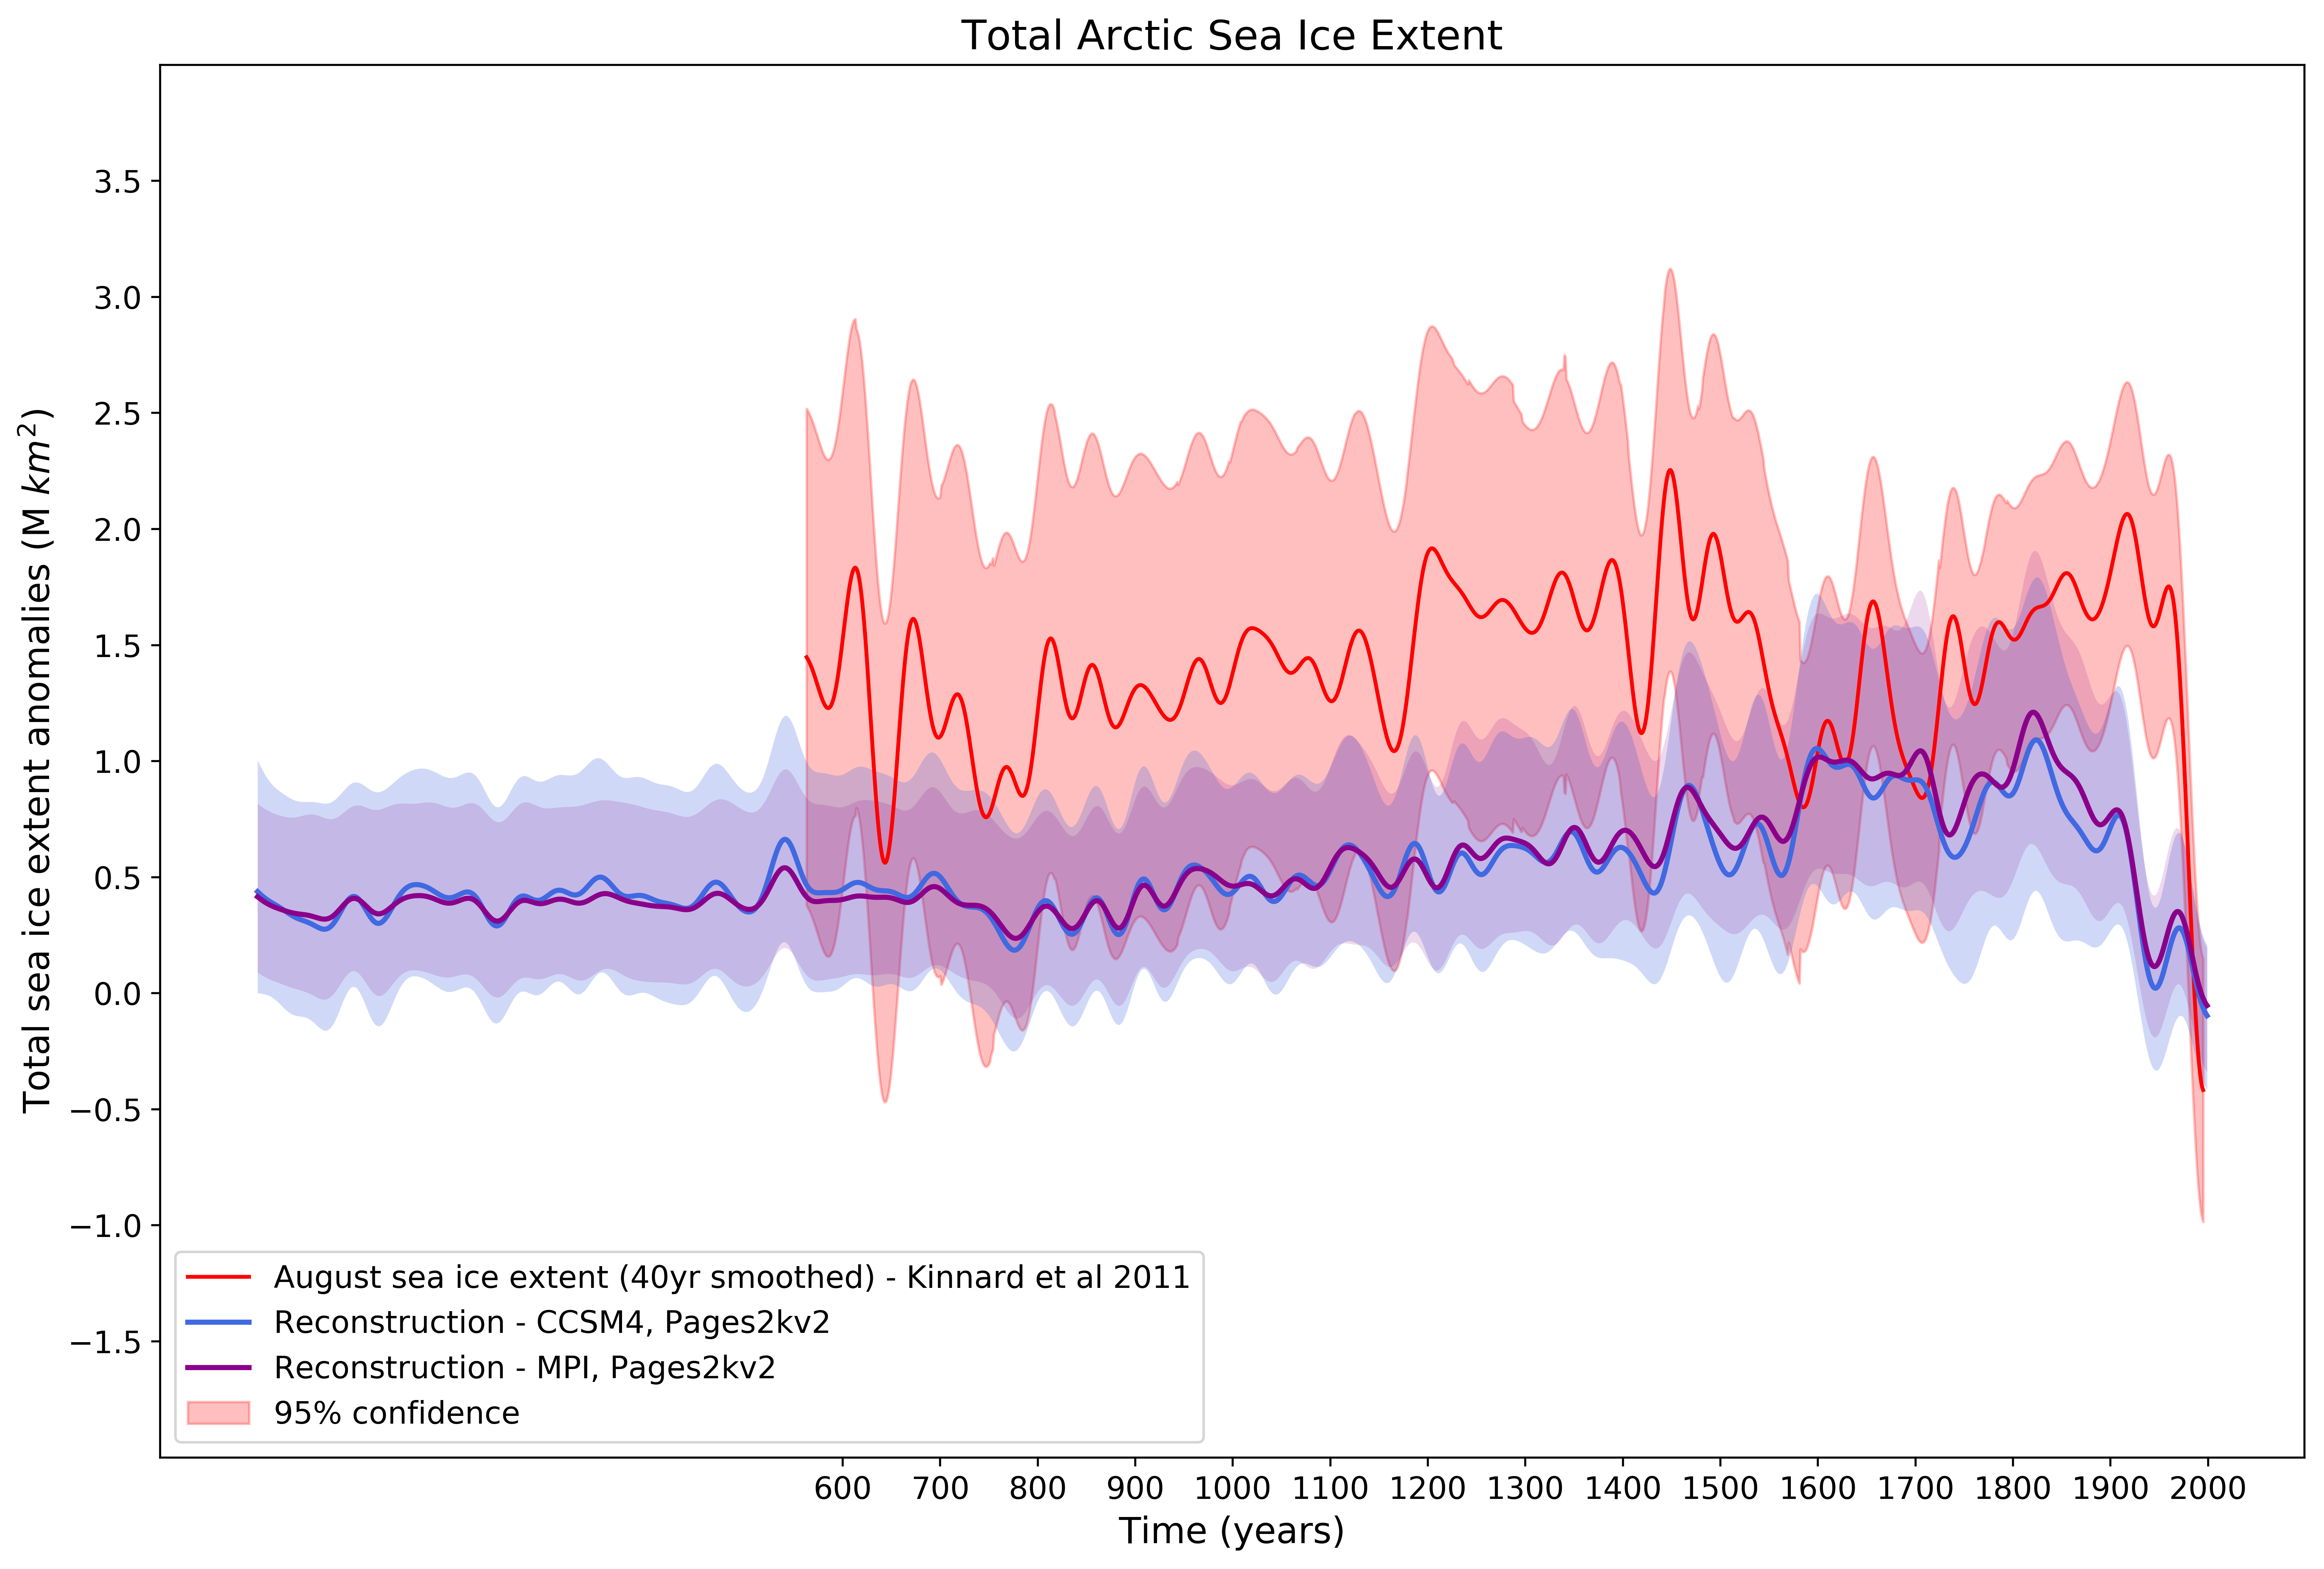

In [55]:
plt.subplots(figsize=(15,10))

plt.fill_between(kinnard_year,kinnard_sie_high_anom,kinnard_sie_low_anom,
                 label='95% confidence', color='r',alpha=0.25)
plt.fill_between(recon_years,sie_ccsm4_low_filt40,sie_ccsm4_high_filt40,
                 alpha=0.25, color='royalblue',linewidth=0.0)
plt.fill_between(recon_years,sie_mpi_low_filt40,sie_mpi_high_filt40,
                 alpha=0.15, color='darkmagenta',linewidth=0.0)

plt.plot(kinnard_year,kinnard_sie_anom,color='r',
         label='August sea ice extent (40yr smoothed) - Kinnard et al 2011')
plt.plot(recon_years,sie_ccsm4_filt40,color='royalblue',#'#8756e4',
         label='Reconstruction - CCSM4, Pages2kv2',linewidth=2)
plt.plot(recon_years,sie_mpi_filt40,color='darkmagenta',#'#8756e4',
         label='Reconstruction - MPI, Pages2kv2',linewidth=2)

plt.xlabel('Time (years)', fontsize=14)
plt.ylabel('Total sea ice extent anomalies (M $km^{2}$)', fontsize=14)
plt.title('Total Arctic Sea Ice Extent', fontsize=16) 

plt.yticks(np.arange(-1.5, 4, 0.5), fontsize=12)
plt.xticks(np.arange(600, 2001,100), fontsize=12)

plt.ylim(-2,4)
plt.legend(loc = 'lower left', fontsize=12)


In [23]:
plt.fill_between(recon_years,sie_2_5_allit_ccsm4,sie_97_5_allit_ccsm4,alpha=0.2)
plt.fill_between(recon_years,p2_anom,p1_anom,alpha=0.2,color='r', linewidth=0.0)
plt.plot(recon_years,sie_ensmn_anom_allit_ccsm4)

#plt.xlim(0,100)

In [23]:
[ce_sie_ccsm4_mpi,corr_sie_ccsm4_mpi,
 var_sie_sat_ccsm4_mpi,
 var_sie_recon_ccsm4_mpi] = rrutils.find_ce_corr(sie_ensmn_anom_allit_ccsm4, 
                                                 sie_bren2020['sie_MPI_HadCRUT4_anom'],
                                                 bren2020_time,
                                                 np.array(recon_years),1850,1999)
ce_sie_ccsm4_mpi,corr_sie_ccsm4_mpi**2

(0.490462811192813, 0.5927816569829621)

In [24]:
[ce_sie_mpi_mpi,corr_sie_mpi_mpi,
 var_sie_sat_mpi_mpi,
 var_sie_recon_mpi_mpi] = rrutils.find_ce_corr(sie_ensmn_anom_allit_mpi, 
                                                 sie_bren2020['sie_MPI_HadCRUT4_anom'],
                                                 bren2020_time,
                                                 np.array(recon_years),1850,1999)
ce_sie_mpi_mpi,corr_sie_mpi_mpi**2

(0.2706284735676001, 0.5637997107565497)

In [25]:
[ce_sie_ccsm4_ccsm4,corr_sie_ccsm4_ccsm4,
 var_sie_sat_ccsm4_ccsm4,
 var_sie_recon_ccsm4_ccsm4] = rrutils.find_ce_corr(sie_ensmn_anom_allit_ccsm4, 
                                                   sie_bren2020['sie_CCSM4_HadCRUT4_anom'],
                                                   bren2020_time,
                                                   np.array(recon_years),1850,1999)

ce_sie_ccsm4_ccsm4,corr_sie_ccsm4_ccsm4**2

(0.30617775595024654, 0.49669215005916384)

In [26]:
# [ce_sie_ccsm4_ccsm4,corr_sie_ccsm4_ccsm4,
#  var_sie_sat_ccsm4_ccsm4,
#  var_sie_recon_ccsm4_ccsm4] = rrutils.find_ce_corr(sie_ensmn_anom_allit_ccsm4, 
#                                                    sie_ensmn_anom_allit_mpi,
#                                                    np.array(recon_years),
#                                                    np.array(recon_years),1850,1999)

# ce_sie_ccsm4_ccsm4,corr_sie_ccsm4_ccsm4**2

In [27]:
[ce_sie_mpi_ccsm4,corr_sie_mpi_ccsm4,
 var_sie_sat_mpi_ccsm4,
 var_sie_recon_mpi_ccsm4] = rrutils.find_ce_corr(sie_ensmn_anom_allit_mpi, 
                                                   sie_bren2020['sie_CCSM4_HadCRUT4_anom'],
                                                   bren2020_time,
                                                   np.array(recon_years),1850,1999)

ce_sie_mpi_ccsm4,corr_sie_mpi_ccsm4**2

(0.02264406427073018, 0.46022226424564444)

In [28]:
[ce_sie_recon_mpi_ccsm4,
 corr_sie_recon_mpi_ccsm4,_,_] = rrutils.find_ce_corr(sie_ensmn_anom_allit_ccsm4, 
                                                      sie_ensmn_anom_allit_mpi,
                                                      np.array(recon_years),
                                                      np.array(recon_years),1850,1999)

ce_sie_recon_mpi_ccsm4,corr_sie_recon_mpi_ccsm4**2

(0.8061682030367926, 0.8520644339852489)

In [29]:
[ce_sie_walsh_mpi,corr_sie_walsh_mpi,
 var_sie_sat_walsh_mpi,
 var_sie_recon_walsh_mpi] = rrutils.find_ce_corr(sie_ensmn_anom_allit_mpi, 
                                                  walsh_sie_anom,
                                                  walsh_time,
                                                  np.array(recon_years),1850,1999)

[ce_sie_walsh_ccsm4,corr_sie_walsh_ccsm4,
 var_sie_sat_walsh_ccsm4,
 var_sie_recon_walsh_ccsm4] = rrutils.find_ce_corr(sie_ensmn_anom_allit_ccsm4, 
                                                   walsh_sie_anom,
                                                   walsh_time,
                                                   np.array(recon_years),1850,1999)

ce_sie_walsh_mpi,corr_sie_walsh_mpi**2

(0.06669527377269846, 0.4659536862698242)

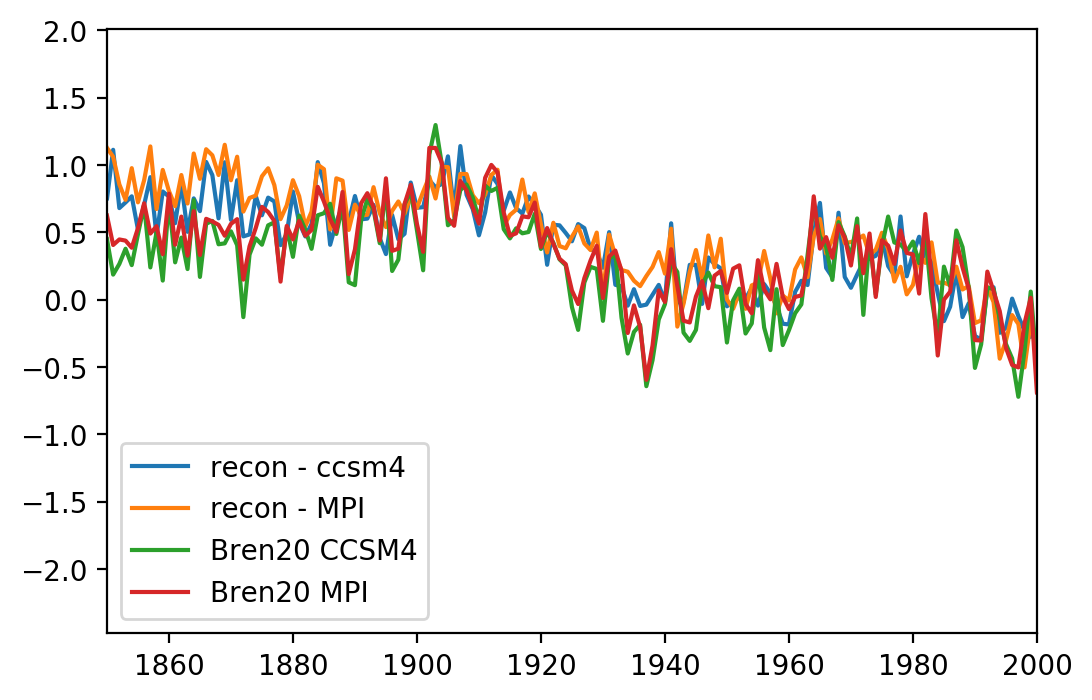

In [30]:
plt.plot(np.array(recon_years),sie_ensmn_anom_allit_ccsm4,label='recon - ccsm4')
plt.plot(np.array(recon_years),sie_ensmn_anom_allit_mpi,label='recon - MPI')

plt.plot(bren2020_time,sie_bren2020['sie_CCSM4_HadCRUT4_anom'], label='Bren20 CCSM4')
plt.plot(bren2020_time,sie_bren2020['sie_MPI_HadCRUT4_anom'], label='Bren20 MPI')
plt.xlim(1850,2000)
plt.legend()

In [31]:
sie_ens_allit_2d_mpi = np.reshape(sie_ens_allit_mpi,(sie_ens_allit_mpi.shape[0],
                                  sie_ens_allit_mpi.shape[1]*sie_ens_allit_mpi.shape[2]))
sie_ens_anom_allit_mpi = sie_ens_allit_2d_mpi - np.nanmean(np.squeeze(sie_ens_allit_2d_mpi[anom_ind,:]),axis=0)
sie_ensmn_anom_allit_mpi = np.nanmean(sie_ens_anom_allit_mpi,axis=1)

sie_97_5_allit_mpi = np.percentile(sie_ens_anom_allit_mpi,97.5,axis=1)
sie_2_5_allit_mpi = np.percentile(sie_ens_anom_allit_mpi,2.5,axis=1)

[ce_sie_mpi,corr_sie_mpi,
 var_sie_sat_mpi,var_sie_recon_mpi] = rrutils.find_ce_corr(sie_ensmn_anom_allit_mpi, 
                                                           sie_bren2020['sie_MPI_HadCRUT4_anom'],
                                                           bren2020_time,
                                                           np.array(recon_years),1850,1999)

In [32]:
[ce_sie_ccsm4_sat,corr_sie_ccsm4_sat,
 var_sie_sat_ccsm4_sat,
 var_sie_recon_ccsm4_sat] = rrutils.find_ce_corr(sie_ensmn_anom_allit_ccsm4, 
                                                 fet_sie_anom,fet_time,
                                                 np.array(recon_years),anom_start,anom_end-1)

[ce_sie_mpi_sat,corr_sie_mpi_sat,
 var_sie_sat_ccsm4_sat,
 var_sie_recon_ccsm4_sat] = rrutils.find_ce_corr(sie_ensmn_anom_allit_mpi, 
                                                 fet_sie_anom,fet_time,
                                                 np.array(recon_years),anom_start,anom_end-1)

In [33]:
corr_sie_mpi_sat, corr_sie_ccsm4_sat

(0.708735931868376, 0.7723118441825487)

(-2, 1.2)

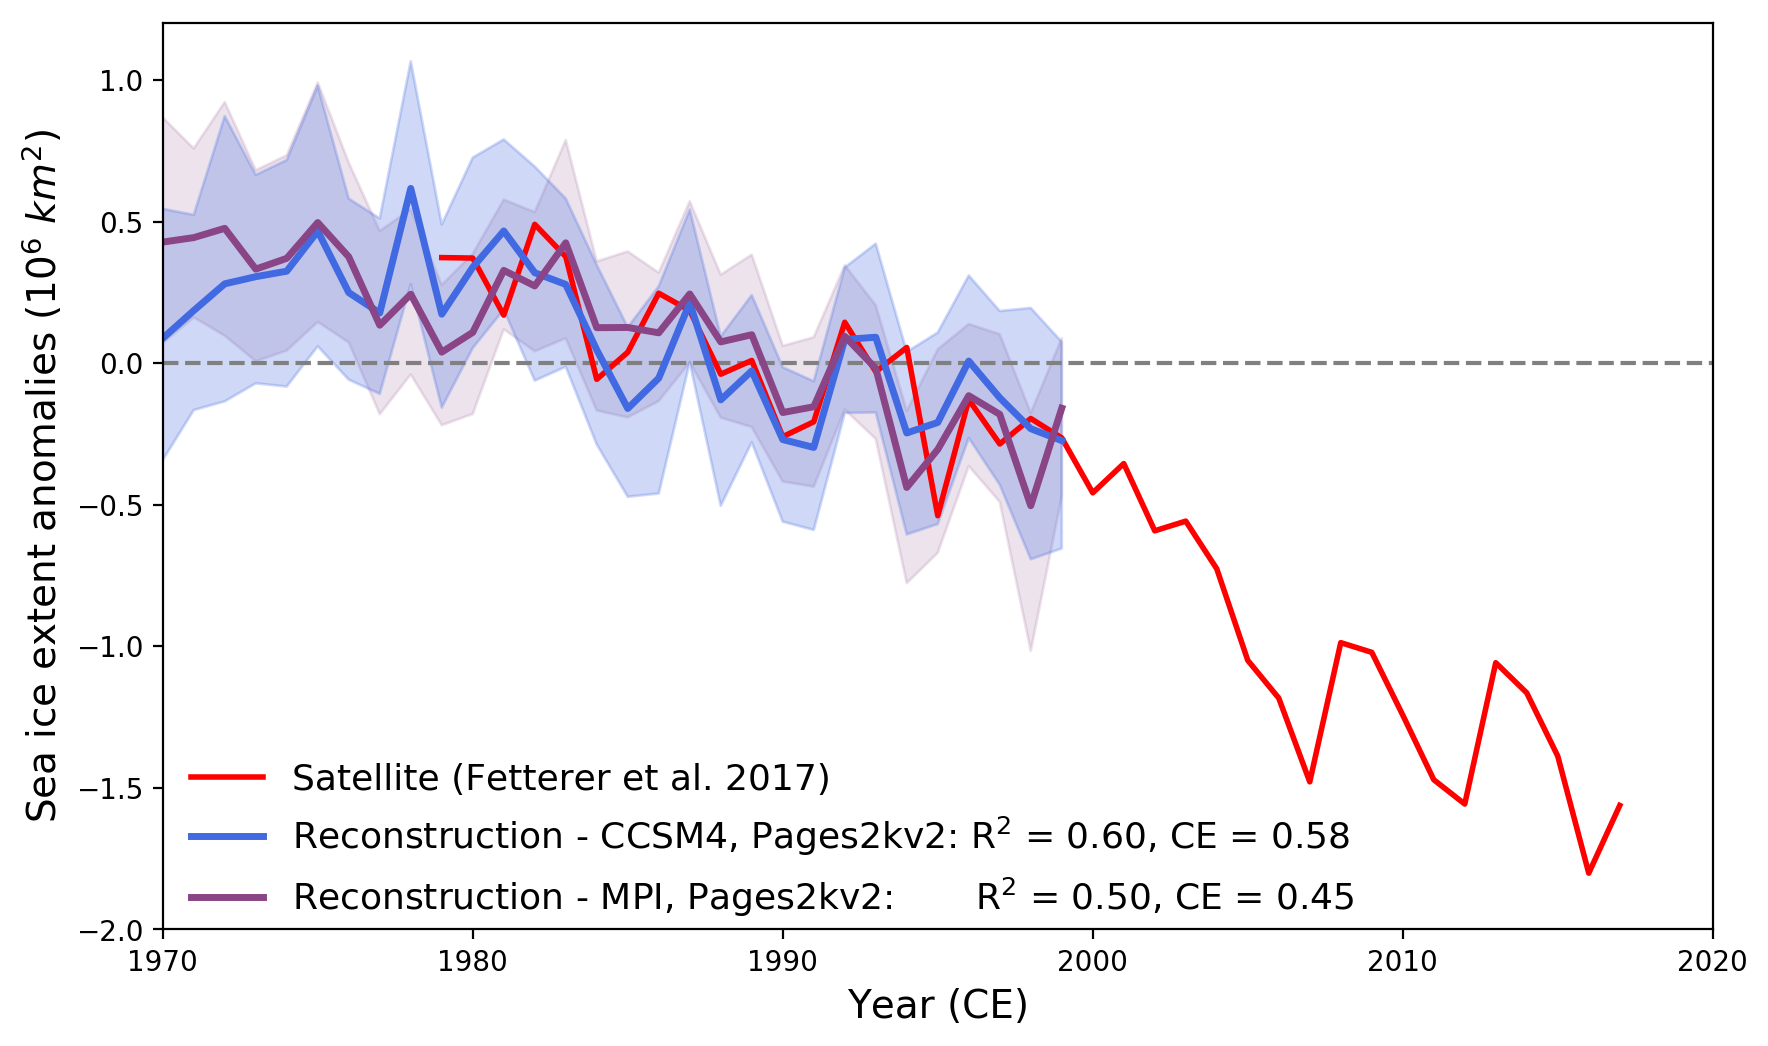

In [34]:
plt.figure(figsize=(10,6))
plt.axhline(0,linestyle='--',color='grey')

plt.fill_between(recon_years,sie_2_5_allit_mpi,sie_97_5_allit_mpi,alpha=0.15, color='#894585')
plt.fill_between(recon_years,sie_2_5_allit_ccsm4,sie_97_5_allit_ccsm4,alpha=0.25,color='royalblue')

plt.plot(fet_time,fet_sie_anom,label='Satellite (Fetterer et al. 2017)', color='r',linewidth=2)
plt.plot(recon_years,sie_ensmn_anom_allit_ccsm4,color='royalblue',#'#107ab0',
         label='Reconstruction - CCSM4, Pages2kv2: R$^{2}$ = ' + '{:,.2f}'.format(corr_sie_ccsm4_sat**2)+
               ', CE = '+'{:,.2f}'.format(ce_sie_ccsm4_sat),linewidth=2.5)
plt.plot(recon_years,sie_ensmn_anom_allit_mpi, color='#894585',
         label='Reconstruction - MPI, Pages2kv2:       R$^{2}$ = ' + '{:,.2f}'.format(corr_sie_mpi_sat**2)+
               ', CE = '+'{:,.2f}'.format(ce_sie_mpi_sat),linewidth=2.5)

plt.ylabel('Sea ice extent anomalies (10$^{6}$ $km^2$)',fontsize=14)
plt.xlabel('Year (CE)',fontsize=14)
#plt.title('Total Arctic Sea Ice Extent', fontsize=14)

#plt.ylim(7,13.1,1)
ce_corr_plt_ccsm4 = (('(Satellite, DA recon): R$^{2}$ = ' + '{:,.2f}'.format(corr_sie_ccsm4_sat**2))+
               ', CE = '+'{:,.2f}'.format(ce_sie_ccsm4_sat))
ce_corr_plt_mpi = (('(Satellite, DA recon):  R$^{2}$ = ' + '{:,.2f}'.format(corr_sie_mpi_sat**2))+
               ', CE = '+'{:,.2f}'.format(ce_sie_mpi_sat))

plt.legend(fontsize=13,bbox_to_anchor=(0.79, 0.22),frameon=False)

# plt.gcf().text(0.14, 0.18, ce_corr_plt_ccsm4 , fontsize=13,color='royalblue')
# plt.gcf().text(0.14, 0.14, ce_corr_plt_mpi , fontsize=13,color='#894585')

plt.xlim(1970,2020)
plt.ylim(-2,1.2)

#print(ce_sie,corr_sie,var_sie_sat,var_sie_recon)

# savedir = ('/home/disk/p/mkb22/Documents/si_analysis_kb/common_era_experiments/'+
#            'analysis/figures/Brennan_Hakim_2020/')
# savename = 'tot_sie_v_sat_10it_1979_2017.png'
# plt.savefig(savedir+savename)

(1850, 2020)

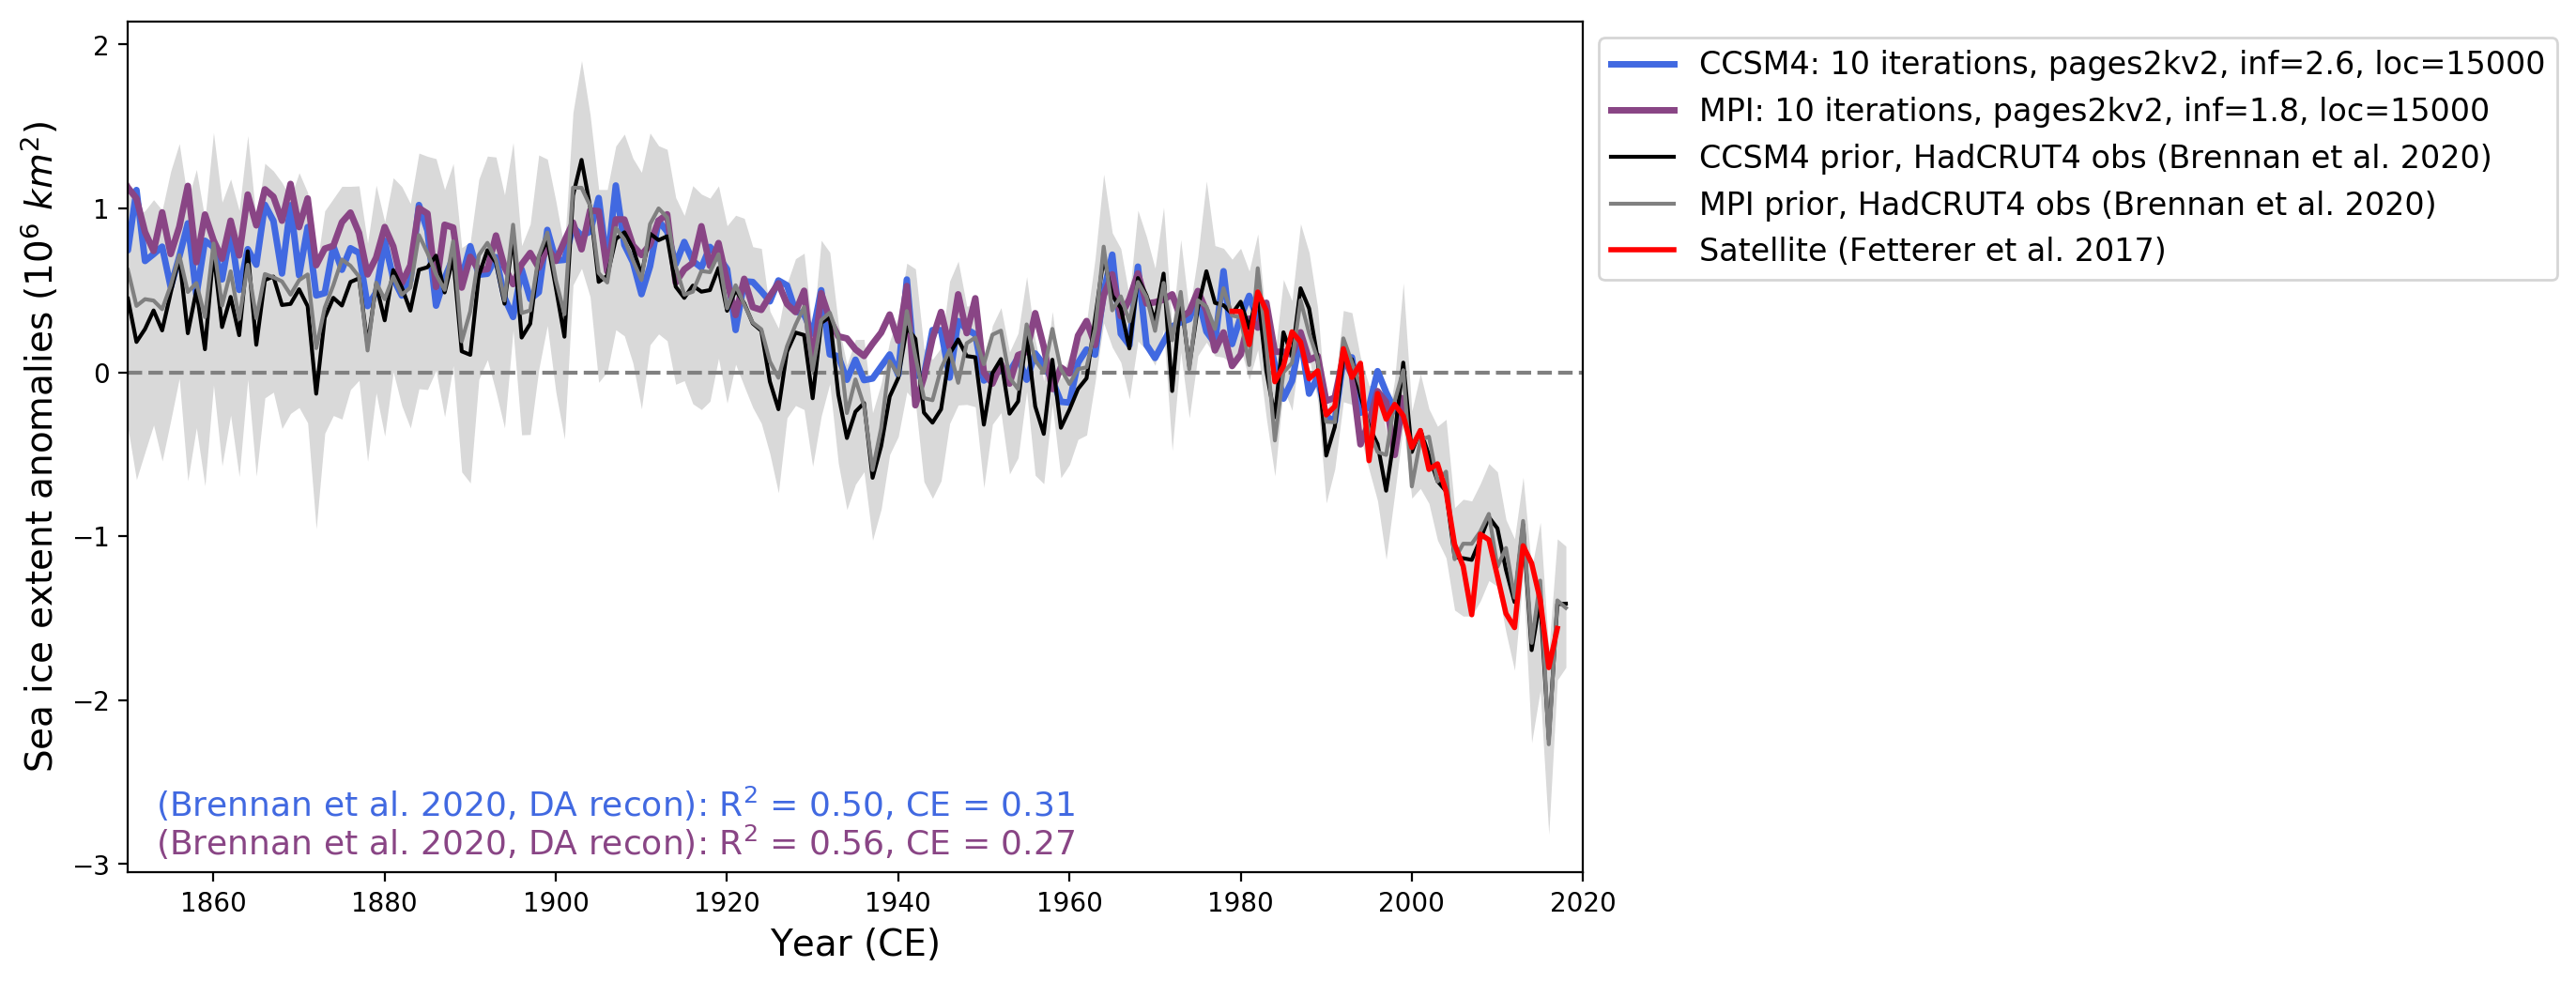

In [35]:
plt.figure(figsize=(10,6))
plt.axhline(0,linestyle='--',color='grey')

# plt.fill_between(recon_years,sie_2_5_allit_mpi,sie_97_5_allit_mpi,alpha=0.15, color='purple')
# plt.fill_between(recon_years,sie_2_5_allit_ccsm4,sie_97_5_allit_ccsm4,alpha=0.25)
plt.fill_between(bren2020_time,sie_CCSM4_HadCRUT4_2_5_anom,
                 sie_CCSM4_HadCRUT4_97_5_anom,color='k',alpha=0.15, linewidth=0.01)

plt.plot(recon_years,sie_ensmn_anom_allit_ccsm4,color='royalblue',#'#107ab0',
         label='CCSM4: '+str(niter)+' iterations, pages2kv2, inf=2.6, loc=15000',linewidth=2.5)
plt.plot(recon_years,sie_ensmn_anom_allit_mpi, color='#894585',
         label='MPI: '+str(niter)+' iterations, pages2kv2, inf=1.8, loc=15000',linewidth=2.5)
plt.plot(bren2020_time,sie_bren2020['sie_CCSM4_HadCRUT4_anom'],
         label='CCSM4 prior, HadCRUT4 obs (Brennan et al. 2020)', color='k',linewidth=1.5)
plt.plot(bren2020_time,sie_bren2020['sie_MPI_HadCRUT4_anom'],
         label='MPI prior, HadCRUT4 obs (Brennan et al. 2020)', color='grey',linewidth=1.5)
plt.plot(fet_time,fet_sie_anom,label='Satellite (Fetterer et al. 2017)', color='r',linewidth=2)

plt.ylabel('Sea ice extent anomalies (10$^{6}$ $km^2$)',fontsize=14)
plt.xlabel('Year (CE)',fontsize=14)
#plt.title('Total Arctic Sea Ice Extent', fontsize=14)

plt.legend(fontsize=12,bbox_to_anchor=(1, 1))
#plt.ylim(7,13.1,1)
ce_corr_plt_ccsm4 = (('(Brennan et al. 2020, DA recon): R$^{2}$ = ' + '{:,.2f}'.format(corr_sie_ccsm4**2))+
               ', CE = '+'{:,.2f}'.format(ce_sie_ccsm4))
ce_corr_plt_mpi = (('(Brennan et al. 2020, DA recon): R$^{2}$ = ' + '{:,.2f}'.format(corr_sie_mpi**2))+
               ', CE = '+'{:,.2f}'.format(ce_sie_mpi))

plt.gcf().text(0.14, 0.175, ce_corr_plt_ccsm4 , fontsize=13,color='royalblue')
plt.gcf().text(0.14, 0.14, ce_corr_plt_mpi , fontsize=13,color='#894585')

plt.xlim(1850,2020)
#plt.xlim(0,100)

#print(ce_sie,corr_sie,var_sie_sat,var_sie_recon)

# savedir = ('/home/disk/p/mkb22/Documents/si_analysis_kb/common_era_experiments/'+
#            'analysis/figures/sic_ccsm4_anrecon_1979_2000_fullLMRdbv1_1_inf1_loc25000_10iterations/')
# savename = 'tot_sie_v_sat_10it_1979_2017.png'
# plt.savefig(savedir+savename)

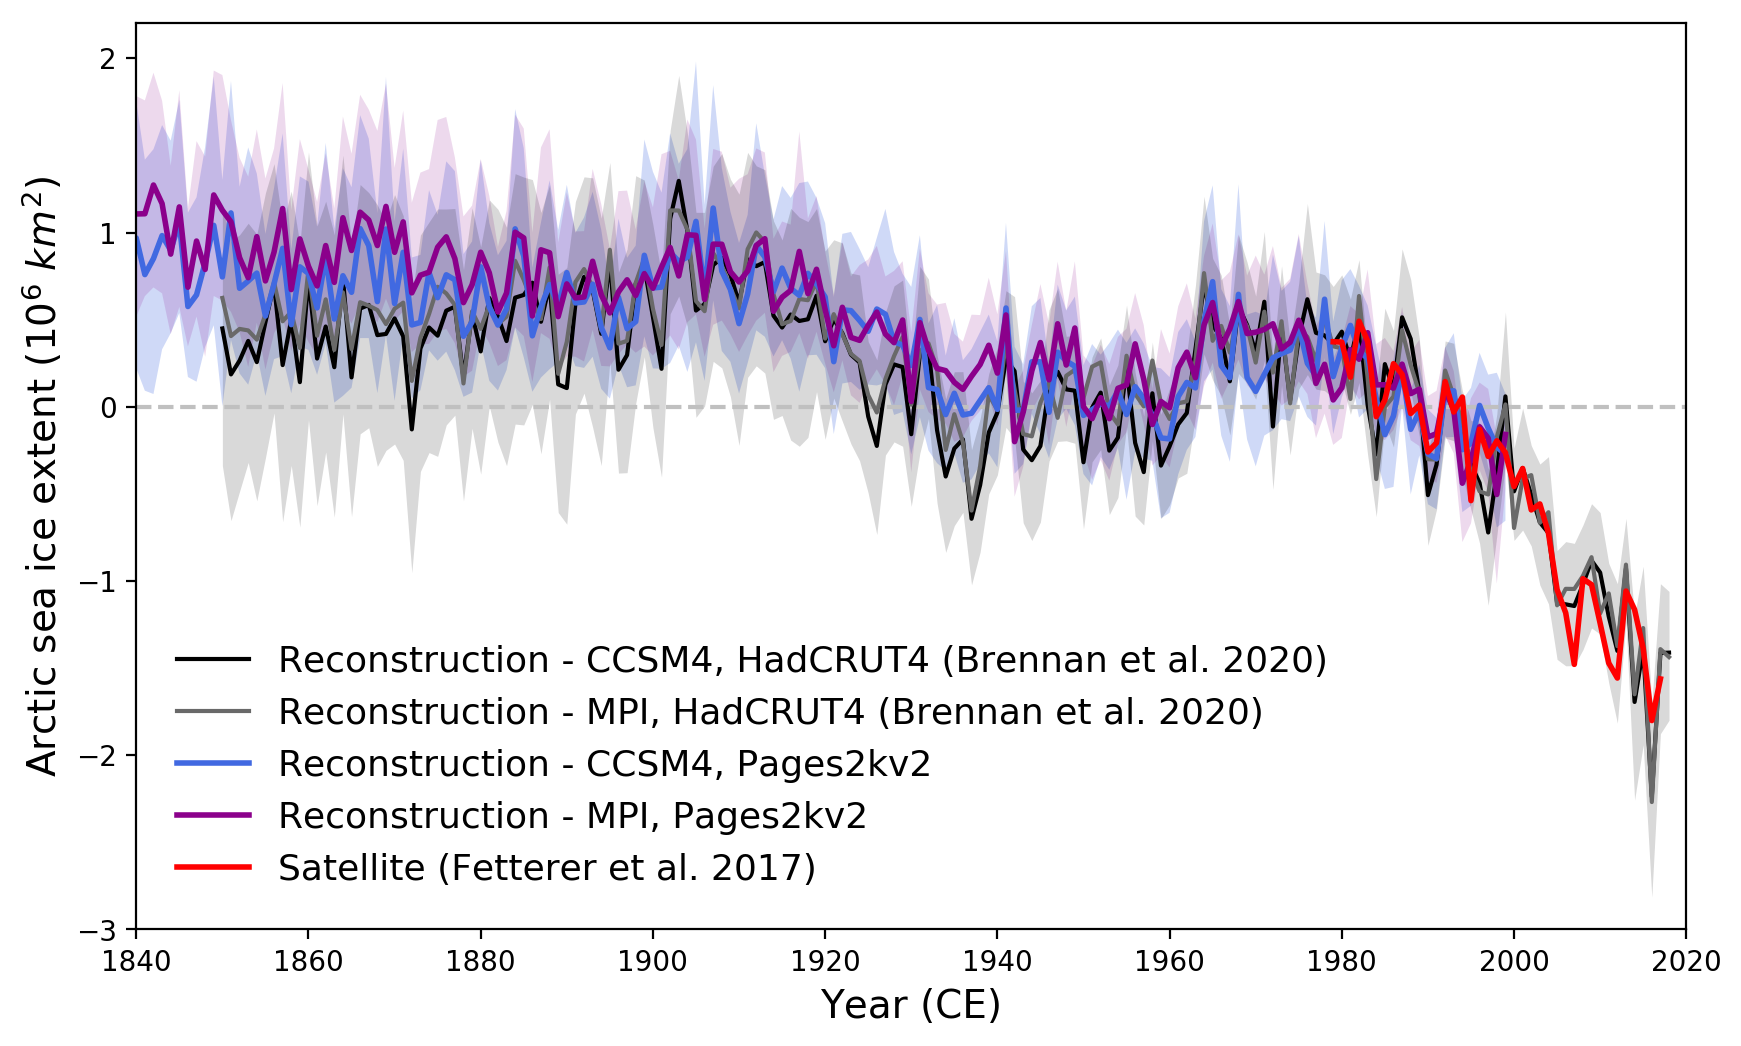

In [36]:
plt.figure(figsize=(10,6))
plt.axhline(0,linestyle='--',color='silver')

# plt.fill_between(recon_years,sie_2_5_allit_mpi,sie_97_5_allit_mpi,alpha=0.15, color='purple')
plt.fill_between(recon_years,sie_2_5_allit_ccsm4,sie_97_5_allit_ccsm4,
                 alpha=0.25, color='royalblue',linewidth=0.0)
plt.fill_between(recon_years,sie_2_5_allit_mpi,sie_97_5_allit_mpi,
                 alpha=0.15, color='darkmagenta',linewidth=0.0)
plt.fill_between(bren2020_time,sie_CCSM4_HadCRUT4_2_5_anom,sie_CCSM4_HadCRUT4_97_5_anom,
                 color='k',alpha=0.15,linewidth=0.0)
# plt.fill_between(bren2020_time,sie_MPI_HadCRUT4_2_5_anom,sie_CCSM4_HadCRUT4_97_5_anom,
#                  color='k',alpha=0.1,linewidth=0.0)


# plt.plot(walsh_time,walsh_sie_anom,
#          label='Reconstruction - Walsh et al 2017', color='sienna',#'#a2653e',#'saddlebrown',#color='#836539',
#          linewidth=1.5)#, linestyle=(0,(1,1))
plt.plot(bren2020_time,sie_bren2020['sie_CCSM4_HadCRUT4_anom'],
         label='Reconstruction - CCSM4, HadCRUT4 (Brennan et al. 2020)',
         color='k',linewidth=1.5)
plt.plot(bren2020_time,sie_bren2020['sie_MPI_HadCRUT4_anom'],
         label='Reconstruction - MPI, HadCRUT4 (Brennan et al. 2020)',
         color='dimgray',linewidth=1.5)
# plt.plot(bren2020_time,sie_bren2020['sie_CCSM4_HadCRUT4_anom'],
#          label='Reconstruction - CCSM4, HadCRUT4 (Brennan et al. 2020)',
#          color='k',linewidth=1.5)
plt.plot(recon_years,sie_ensmn_anom_allit_ccsm4,color='royalblue',#'#8756e4',
         label='Reconstruction - CCSM4, Pages2kv2',linewidth=2)
plt.plot(recon_years,sie_ensmn_anom_allit_mpi,color='darkmagenta',#'#8756e4',
         label='Reconstruction - MPI, Pages2kv2',linewidth=2)

# plt.plot(bren2020_time,sie_bren2020['sie_MPI_HadCRUT4_anom'],
#          label='MPI prior, HadCRUT4 obs (Brennan et al. 2020)', color='grey',linewidth=1.5)
plt.plot(fet_time,fet_sie_anom,label='Satellite (Fetterer et al. 2017)', color='r',linewidth=2)

plt.ylabel('Arctic sea ice extent (10$^{6}$ $km^2$)',fontsize=14)
plt.xlabel('Year (CE)',fontsize=14)
#plt.title('Total Arctic Sea Ice Extent', fontsize=14)

plt.legend(fontsize=13,bbox_to_anchor=(0.79, 0.35),frameon=False)
#plt.ylim(7,13.1,1)
ce_corr_plt_ccsm4 = (('(Brennan et al. 2020, DA proxy recon): R$^{2}$ = ' + '{:,.2f}'.format(corr_sie_ccsm4_ccsm4**2))+
               ', CE = '+'{:,.2f}'.format(ce_sie_ccsm4_ccsm4))
ce_corr_plt_sat = (('(Satellite, DA proxy recon):                   R$^{2}$ = ' + '{:,.2f}'.format(corr_sie_ccsm4_sat**2))+
               ', CE = '+'{:,.2f}'.format(ce_sie_ccsm4_sat))

# plt.gcf().text(0.14, 0.14, ce_corr_plt_ccsm4 , fontsize=13,color='k')
# plt.gcf().text(0.14, 0.185, ce_corr_plt_sat , fontsize=13,color='k')

plt.xlim(1840,2020)
plt.ylim(-3,2.2)

# plt.axvline(1907,linestyle='--',color='silver')
# plt.axvline(1938,linestyle='--',color='silver')
# plt.axvline(1964,linestyle='--',color='silver')
# plt.axvline(1950,linestyle='--',color='silver')

#print(ce_sie,corr_sie,var_sie_sat,var_sie_recon)

savedir = ('/home/disk/p/mkb22/Documents/si_analysis_kb/common_era_experiments/'+
           'analysis/figures/Brennan_Hakim_2020/')
savename = 'tot_sie_ccsm4_v_sat_brennan_ccsm4_mpi_10it_1850_2017.png'
#plt.savefig(savedir+savename)

In [46]:
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

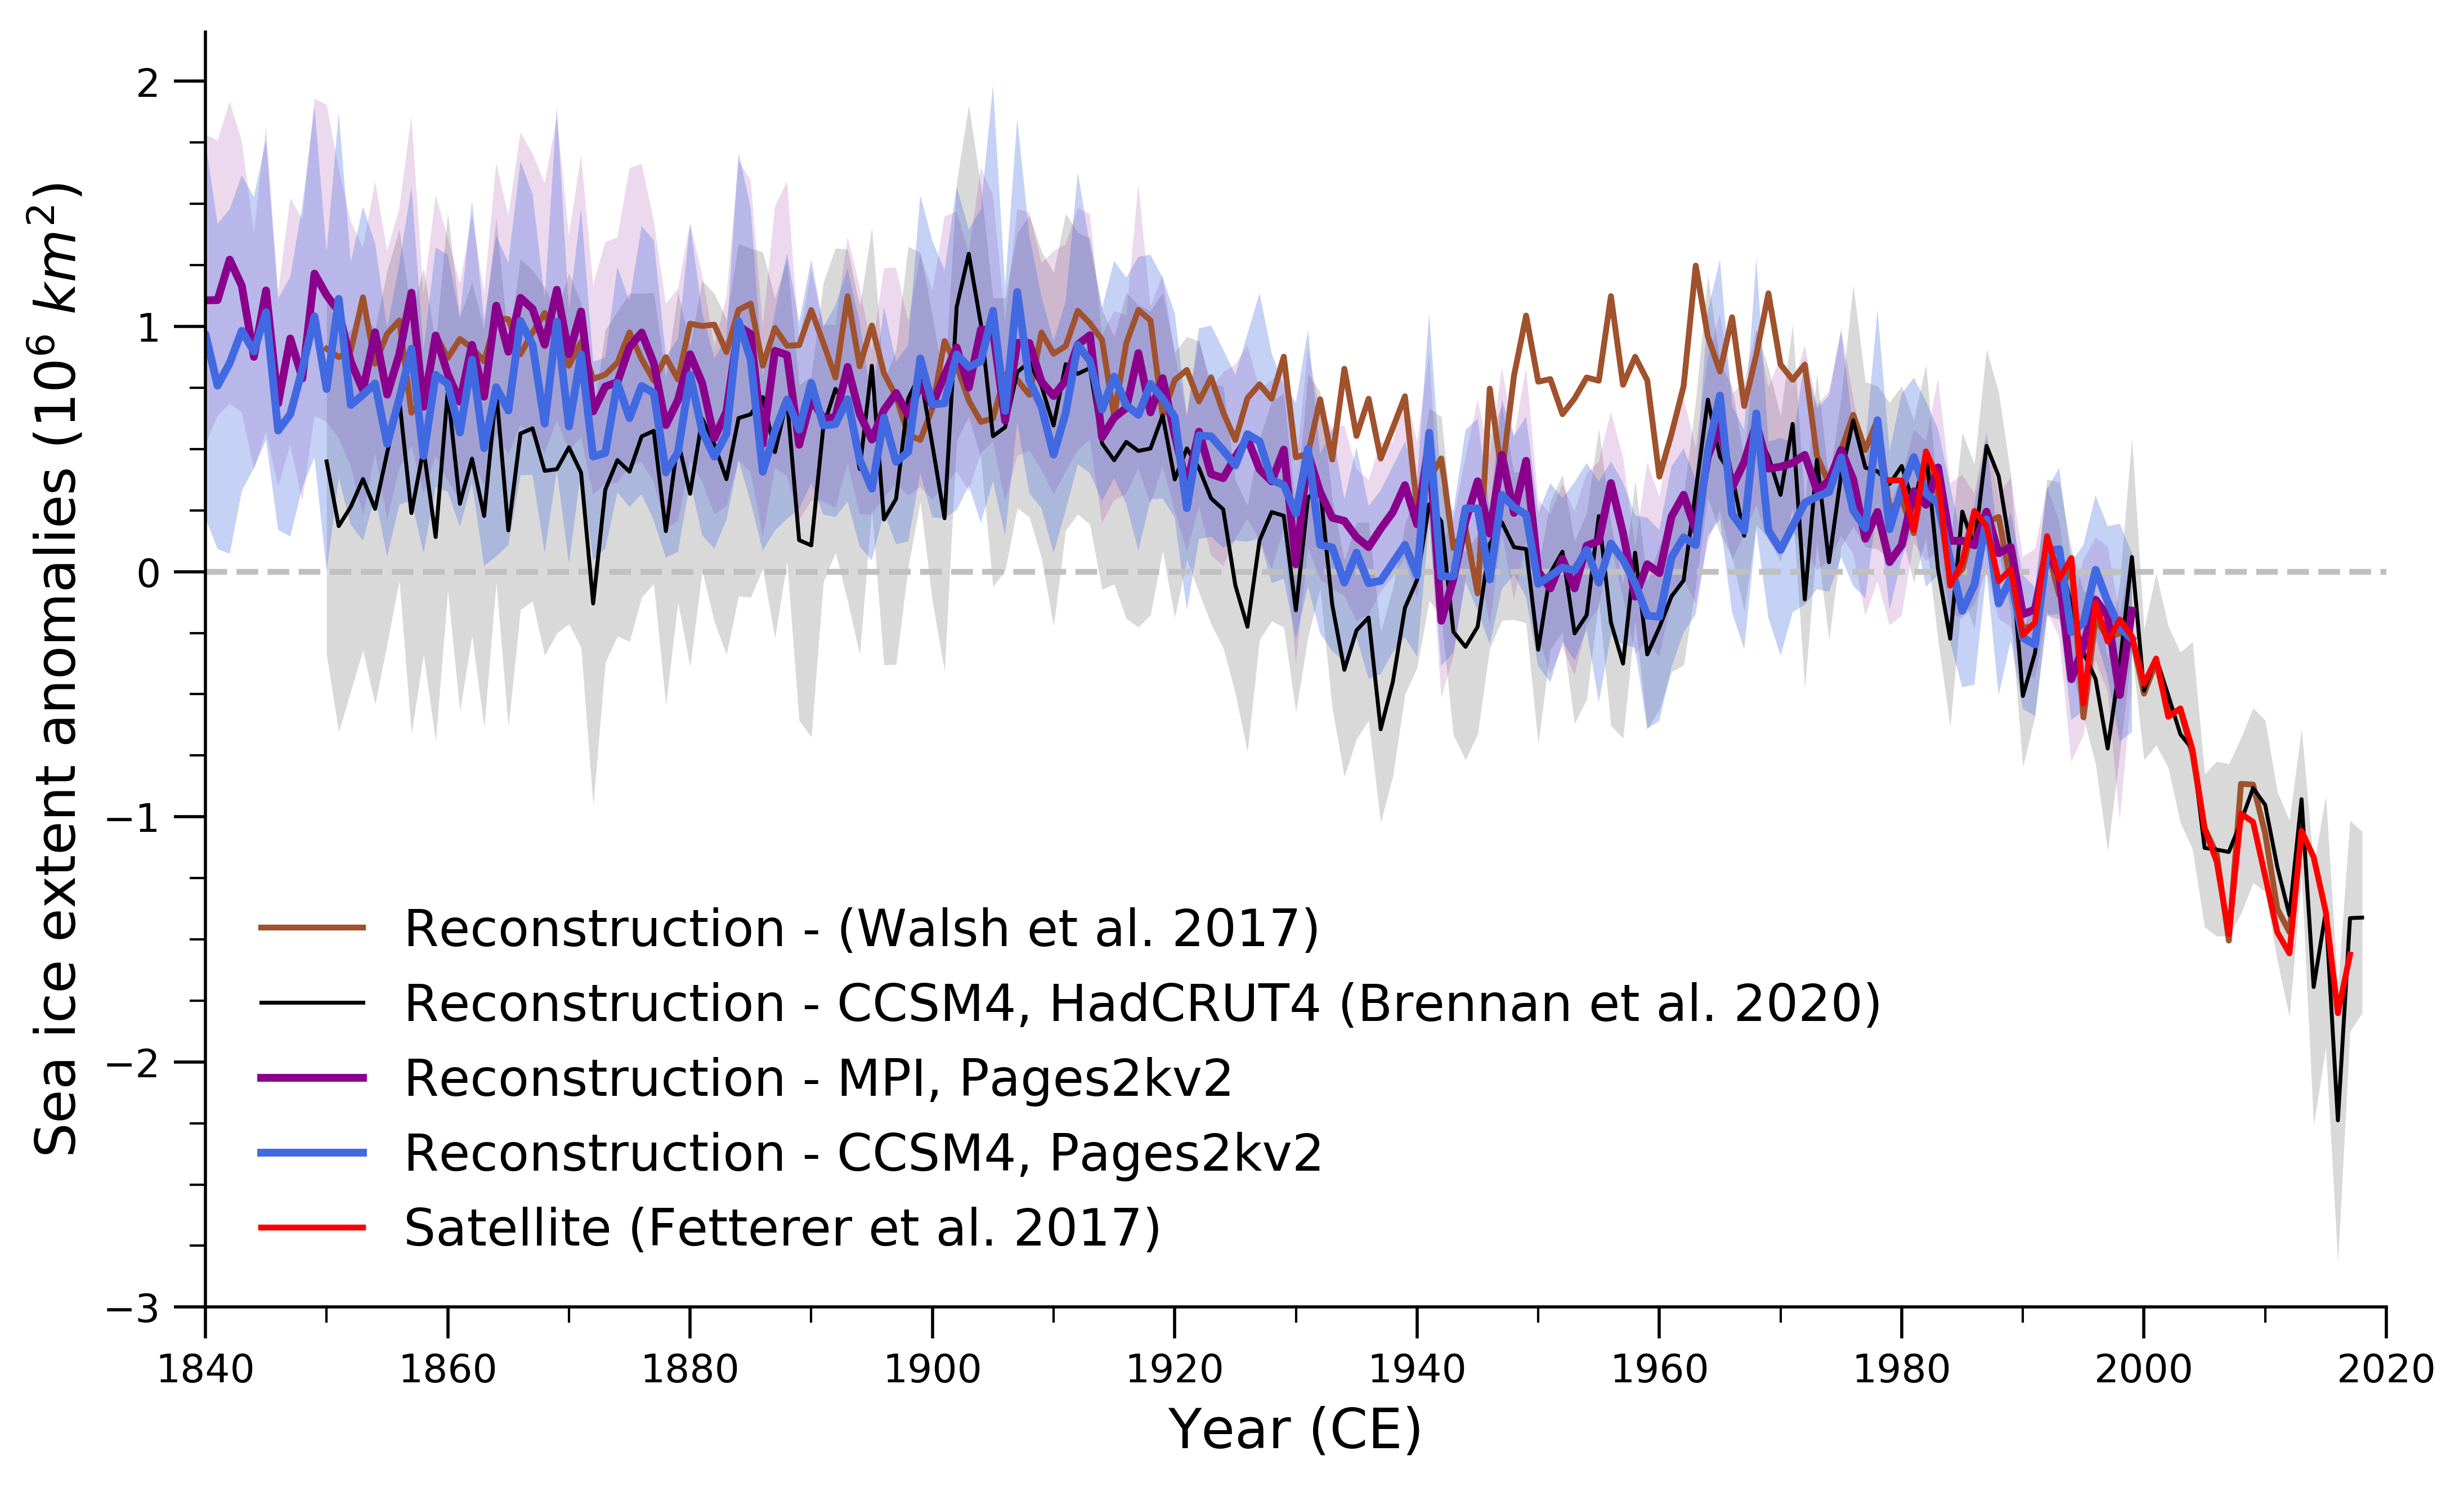

In [85]:
#plt.figure(figsize=(10,6))
fig,ax = plt.subplots(1,figsize=(10,6))
plt.axhline(0,linestyle='--',color='silver')

# plt.fill_between(recon_years,sie_2_5_allit_mpi,sie_97_5_allit_mpi,alpha=0.15, color='purple')
plt.fill_between(bren2020_time,sie_CCSM4_HadCRUT4_2_5_anom,sie_CCSM4_HadCRUT4_97_5_anom,
                 color='k',alpha=0.15,linewidth=0.01)
# plt.fill_between(bren2020_time,sie_MPI_HadCRUT4_2_5_anom,sie_MPI_HadCRUT4_97_5_anom,
#                  color='k',alpha=0.15,linewidth=0.01)
plt.fill_between(recon_years,sie_2_5_allit_mpi,sie_97_5_allit_mpi,
                 alpha=0.15, color='darkmagenta',linewidth=0.0)
plt.fill_between(recon_years,sie_2_5_allit_ccsm4,sie_97_5_allit_ccsm4,
                 alpha=0.3, color='royalblue',linewidth=0.01)

plt.plot(walsh_time,walsh_sie_anom,
         label='Reconstruction - (Walsh et al. 2017)', color='sienna',#'#a2653e',#'saddlebrown',#color='#836539',
         linewidth=1.5)#, linestyle=(0,(1,1))
plt.plot(bren2020_time,sie_bren2020['sie_CCSM4_HadCRUT4_anom'],
         label='Reconstruction - CCSM4, HadCRUT4 (Brennan et al. 2020)',
         color='k',linewidth=1)
# plt.plot(bren2020_time,sie_bren2020['sie_MPI_HadCRUT4_anom'],
#          label='Reconstruction - MPI, HadCRUT4 (Brennan et al. 2020)',
#          color='k',linewidth=1.5)
plt.plot(recon_years,sie_ensmn_anom_allit_mpi,color='darkmagenta',#'#8756e4',
         label='Reconstruction - MPI, Pages2kv2',linewidth=2)
plt.plot(recon_years,sie_ensmn_anom_allit_ccsm4,color='royalblue',#'#8756e4',
         label='Reconstruction - CCSM4, Pages2kv2',linewidth=2)

# plt.plot(bren2020_time,sie_bren2020['sie_MPI_HadCRUT4_anom'],
#          label='MPI prior, HadCRUT4 obs (Brennan et al. 2020)', color='grey',linewidth=1.5)
plt.plot(fet_time,fet_sie_anom,label='Satellite (Fetterer et al. 2017)', color='r',linewidth=1.5)

plt.ylabel('Sea ice extent anomalies (10$^{6}$ $km^2$)',fontsize=14)
plt.xlabel('Year (CE)',fontsize=14)
#plt.title('Total Arctic Sea Ice Extent', fontsize=14)

plt.legend(fontsize=13,bbox_to_anchor=(0.79, 0.35),frameon=False)
#plt.ylim(7,13.1,1)
ce_corr_plt_ccsm4 = (('(Brennan et al. 2020, DA proxy recon): R$^{2}$ = ' + '{:,.2f}'.format(corr_sie_ccsm4_ccsm4**2))+
               ', CE = '+'{:,.2f}'.format(ce_sie_ccsm4_ccsm4))
ce_corr_plt_sat = (('(Satellite, DA proxy recon):                   R$^{2}$ = ' + '{:,.2f}'.format(corr_sie_ccsm4_sat**2))+
               ', CE = '+'{:,.2f}'.format(ce_sie_ccsm4_sat))

# plt.gcf().text(0.14, 0.14, ce_corr_plt_ccsm4 , fontsize=12,color='k')
# plt.gcf().text(0.14, 0.185, ce_corr_plt_sat , fontsize=12,color='k')

plt.xlim(1840,2020)
plt.ylim(-3,2.2)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.yaxis.set_minor_locator(MultipleLocator(0.25))
ax.xaxis.set_minor_locator(MultipleLocator(10))
ax.tick_params(which='major', length=8)
ax.tick_params(which='minor', length=4)

# plt.axvline(1907,linestyle='--',color='silver')
# plt.axvline(1938,linestyle='--',color='silver')
# plt.axvline(1964,linestyle='--',color='silver')
# plt.axvline(1950,linestyle='--',color='silver')

#print(ce_sie,corr_sie,var_sie_sat,var_sie_recon)

savedir = ('/home/disk/p/mkb22/Documents/si_analysis_kb/common_era_experiments/'+
           'analysis/figures/Brennan_Hakim_2020/')
savename = 'tot_sie_ccsm4_mpi_v_sat_walsh_brennan_ccsm4_10it_1850_2017.png'
#plt.savefig(savedir+savename)

In [38]:
print("R^2: sat v CCSM4 = "+ str(np.round(corr_sie_ccsm4_sat**2,2)))
print("CE:  sat v CCSM4 = "+ str(np.round(ce_sie_ccsm4_sat,2))+'\n')
print("R^2:   sat v MPI = "+ str(np.round(corr_sie_mpi_sat**2,2)))
print("CE:    sat v MPI = "+ str(np.round(ce_sie_mpi_sat,2))+'\n')

print("R^2: B20 CCSM4 v CCSM4 = "+ str(np.round(corr_sie_ccsm4_ccsm4**2,2)))
print("CE:  B20 CCSM4 v CCSM4 = "+ str(np.round(ce_sie_ccsm4_ccsm4,2))+'\n')
print("R^2: B20 CCSM4 v MPI = "+ str(np.round(corr_sie_mpi_ccsm4**2,2)))
print("CE:  B20 CCSM4 v MPI = "+ str(np.round(ce_sie_mpi_ccsm4,2))+'\n')
print("R^2:   B20 MPI v MPI = "+ str(np.round(corr_sie_mpi_mpi**2,2)))
print("CE:    B20 MPI v MPI = "+ str(np.round(ce_sie_mpi_mpi,2))+'\n')
print("R^2:   B20 MPI v CCSM4 = "+ str(np.round(corr_sie_ccsm4_mpi**2,2)))
print("CE:    B20 MPI v CCSM4 = "+ str(np.round(ce_sie_ccsm4_mpi,2))+'\n')
print("R^2:   Walsh v MPI = "+ str(np.round(corr_sie_walsh_mpi**2,2)))
print("CE:    Walsh v MPI = "+ str(np.round(ce_sie_walsh_mpi,3))+'\n')
print("R^2:   Walsh v CCSM4 = "+ str(np.round(corr_sie_walsh_ccsm4**2,2)))
print("CE:    Walsh v CCSM4 = "+ str(np.round(ce_sie_walsh_ccsm4,2))+'\n')
print("R^2:   Recon MPI v CCSM4 = "+ str(np.round(corr_sie_recon_mpi_ccsm4**2,2)))
print("CE:    Recon MPI v CCSM4 = "+ str(np.round(ce_sie_recon_mpi_ccsm4,2)))

R^2: sat v CCSM4 = 0.6
CE:  sat v CCSM4 = 0.58

R^2:   sat v MPI = 0.5
CE:    sat v MPI = 0.45

R^2: B20 CCSM4 v CCSM4 = 0.5
CE:  B20 CCSM4 v CCSM4 = 0.31

R^2: B20 CCSM4 v MPI = 0.46
CE:  B20 CCSM4 v MPI = 0.02

R^2:   B20 MPI v MPI = 0.56
CE:    B20 MPI v MPI = 0.27

R^2:   B20 MPI v CCSM4 = 0.59
CE:    B20 MPI v CCSM4 = 0.49

R^2:   Walsh v MPI = 0.47
CE:    Walsh v MPI = 0.067

R^2:   Walsh v CCSM4 = 0.36
CE:    Walsh v CCSM4 = -0.33

R^2:   Recon MPI v CCSM4 = 0.85
CE:    Recon MPI v CCSM4 = 0.81


In [115]:
np.array(recon_years)

array([   0,    1,    2, ..., 1997, 1998, 1999])

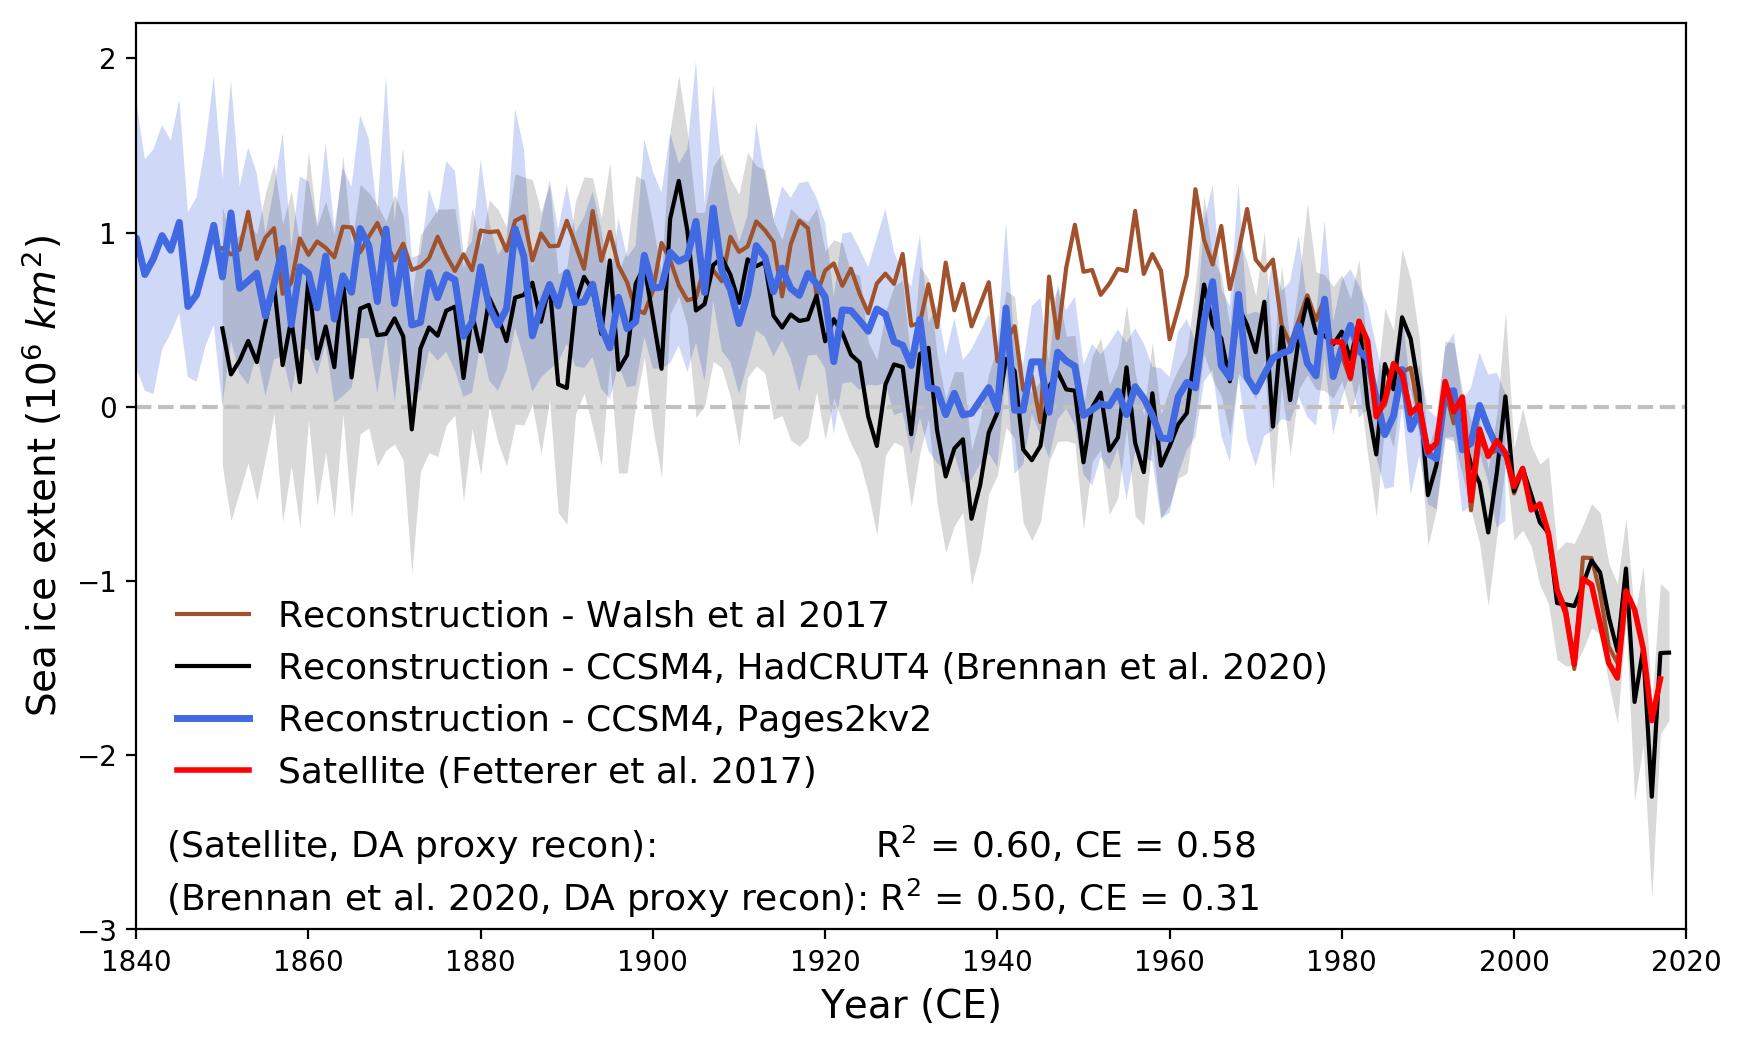

In [39]:
plt.figure(figsize=(10,6))
plt.axhline(0,linestyle='--',color='silver')

# plt.fill_between(recon_years,sie_2_5_allit_mpi,sie_97_5_allit_mpi,alpha=0.15, color='purple')
plt.fill_between(recon_years,sie_2_5_allit_ccsm4,sie_97_5_allit_ccsm4,
                 alpha=0.25, color='royalblue',linewidth=0.01)
plt.fill_between(bren2020_time,sie_CCSM4_HadCRUT4_2_5_anom,sie_CCSM4_HadCRUT4_97_5_anom,
                 color='k',alpha=0.15,linewidth=0.01)

plt.plot(walsh_time,walsh_sie_anom,
         label='Reconstruction - Walsh et al 2017', color='sienna',#'#a2653e',#'saddlebrown',#color='#836539',
         linewidth=1.5)#, linestyle=(0,(1,1))
plt.plot(bren2020_time,sie_bren2020['sie_CCSM4_HadCRUT4_anom'],
         label='Reconstruction - CCSM4, HadCRUT4 (Brennan et al. 2020)',
         color='k',linewidth=1.5)
# plt.plot(bren2020_time,sie_bren2020['sie_CCSM4_HadCRUT4_anom'],
#          label='Reconstruction - CCSM4, HadCRUT4 (Brennan et al. 2020)',
#          color='k',linewidth=1.5)
plt.plot(recon_years,sie_ensmn_anom_allit_ccsm4,color='royalblue',#'#8756e4',
         label='Reconstruction - CCSM4, Pages2kv2',linewidth=2.5)

# plt.plot(bren2020_time,sie_bren2020['sie_MPI_HadCRUT4_anom'],
#          label='MPI prior, HadCRUT4 obs (Brennan et al. 2020)', color='grey',linewidth=1.5)
plt.plot(fet_time,fet_sie_anom,label='Satellite (Fetterer et al. 2017)', color='r',linewidth=2)

plt.ylabel('Sea ice extent (10$^{6}$ $km^2$)',fontsize=14)
plt.xlabel('Year (CE)',fontsize=14)
#plt.title('Total Arctic Sea Ice Extent', fontsize=14)

plt.legend(fontsize=13,bbox_to_anchor=(0.79, 0.4),frameon=False)
#plt.ylim(7,13.1,1)
ce_corr_plt_ccsm4 = (('(Brennan et al. 2020, DA proxy recon): R$^{2}$ = ' + '{:,.2f}'.format(corr_sie_ccsm4_ccsm4**2))+
               ', CE = '+'{:,.2f}'.format(ce_sie_ccsm4_ccsm4))
ce_corr_plt_sat = (('(Satellite, DA proxy recon):                   R$^{2}$ = ' + '{:,.2f}'.format(corr_sie_ccsm4_sat**2))+
               ', CE = '+'{:,.2f}'.format(ce_sie_ccsm4_sat))

plt.gcf().text(0.14, 0.14, ce_corr_plt_ccsm4 , fontsize=13,color='k')
plt.gcf().text(0.14, 0.185, ce_corr_plt_sat , fontsize=13,color='k')

plt.xlim(1840,2020)
plt.ylim(-3,2.2)

# plt.axvline(1907,linestyle='--',color='silver')
# plt.axvline(1938,linestyle='--',color='silver')
# plt.axvline(1964,linestyle='--',color='silver')
# plt.axvline(1950,linestyle='--',color='silver')

#print(ce_sie,corr_sie,var_sie_sat,var_sie_recon)

savedir = ('/home/disk/p/mkb22/Documents/si_analysis_kb/common_era_experiments/'+
           'analysis/figures/Brennan_Hakim_2020/')
savename = 'tot_sie_ccsm4_v_sat_walsh_brennan_ccsm4_10it_1850_2017.png'
#plt.savefig(savedir+savename)

In [40]:
plt.figure(figsize=(10,6))
plt.axhline(0,linestyle='--',color='silver')

# plt.fill_between(recon_years,sie_2_5_allit_mpi,sie_97_5_allit_mpi,alpha=0.15, color='purple')
plt.fill_between(recon_years,sie_2_5_allit_ccsm4,sie_97_5_allit_ccsm4,
                 alpha=0.25, color='royalblue',linewidth=0.01)
plt.fill_between(bren2020_time,sie_CCSM4_HadCRUT4_2_5_anom,sie_CCSM4_HadCRUT4_97_5_anom,
                 color='k',alpha=0.15,linewidth=0.01)

plt.plot(walsh_time,walsh_sie_anom,
         label='Reconstruction - Walsh et al 2017', color='sienna',#'#a2653e',#'saddlebrown',#color='#836539',
         linewidth=1.5)#, linestyle=(0,(1,1))
plt.plot(bren2020_time,sie_bren2020['sie_MPI_HadCRUT4_anom'],
         label='Reconstruction - MPI, HadCRUT4 (Brennan et al. 2020)',
         color='k',linewidth=1.5)
# plt.plot(bren2020_time,sie_bren2020['sie_CCSM4_HadCRUT4_anom'],
#          label='Reconstruction - CCSM4, HadCRUT4 (Brennan et al. 2020)',
#          color='k',linewidth=1.5)
plt.plot(recon_years,sie_ensmn_anom_allit_ccsm4,color='royalblue',#'#8756e4',
         label='Reconstruction - CCSM4, Pages2kv2',linewidth=2.5)

# plt.plot(bren2020_time,sie_bren2020['sie_MPI_HadCRUT4_anom'],
#          label='MPI prior, HadCRUT4 obs (Brennan et al. 2020)', color='grey',linewidth=1.5)
plt.plot(fet_time,fet_sie_anom,label='Satellite (Fetterer et al. 2017)', color='r',linewidth=2)

plt.ylabel('Sea ice extent anomalies (10$^{6}$ $km^2$)',fontsize=14)
plt.xlabel('Year (CE)',fontsize=14)
#plt.title('Total Arctic Sea Ice Extent', fontsize=14)

plt.legend(fontsize=13,bbox_to_anchor=(0.75, 0.4),frameon=False)
#plt.ylim(7,13.1,1)
ce_corr_plt_ccsm4 = (('(Brennan et al. 2020, DA proxy recon): R$^{2}$ = ' + '{:,.2f}'.format(corr_sie_ccsm4_mpi**2))+
               ', CE = '+'{:,.2f}'.format(ce_sie_ccsm4_mpi))
ce_corr_plt_sat = (('(Satellite, DA proxy recon):                   R$^{2}$ = ' + '{:,.2f}'.format(corr_sie_ccsm4_sat**2))+
               ', CE = '+'{:,.2f}'.format(ce_sie_ccsm4_sat))

plt.gcf().text(0.14, 0.14, ce_corr_plt_ccsm4 , fontsize=13,color='k')
plt.gcf().text(0.14, 0.185, ce_corr_plt_sat , fontsize=13,color='k')

plt.xlim(1840,2020)
plt.ylim(-3,2.2)

# plt.axvline(1907,linestyle='--',color='silver')
# plt.axvline(1938,linestyle='--',color='silver')
# plt.axvline(1964,linestyle='--',color='silver')
# plt.axvline(1950,linestyle='--',color='silver')

#print(ce_sie,corr_sie,var_sie_sat,var_sie_recon)

savedir = ('/home/disk/p/mkb22/Documents/si_analysis_kb/common_era_experiments/'+
           'analysis/figures/Brennan_Hakim_2020/')
savename = 'tot_sie_ccsm4_v_sat_walsh_brennan_mpi_10it_1850_2017.png'
#plt.savefig(savedir+savename)

In [60]:
Wn2 = 1.0/20
nf2 = 7
b2,a2 = signal.butter(nf2,Wn2,btype='lowpass')
w2, h2 = signal.freqs(b2, a2)
sie_ccsm4_filt20 = signal.filtfilt(b2,a2,sie_ensmn_anom_allit_ccsm4)

/home/disk/chaos/mkb22/anaconda2/envs/lmr_py3_xarray_test/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


In [86]:
fig, (ax_recon,ax_prox) = plt.subplots(2, figsize=(11,8),sharex=True,
                                       gridspec_kw={"height_ratios": (.75,.25)})

ax_recon.axhline(0,linestyle='--',color='grey')

# plt.fill_between(recon_years,sie_2_5_allit_mpi,sie_97_5_allit_mpi,alpha=0.15, color='purple')
ax_recon.fill_between(recon_years,sie_2_5_allit_ccsm4,sie_97_5_allit_ccsm4,color='gray',lw=0.01,alpha=0.5)
# ax_recon.fill_between(bren2020_time,sie_CCSM4_HadCRUT4_2_5_anom,
#                  sie_CCSM4_HadCRUT4_97_5_anom,color='k',alpha=0.15)

# ax_recon.axvline(1450)
# ax_recon.axvline(1850)

ax_recon.plot(recon_years,sie_ensmn_anom_allit_ccsm4,color='k',#'#107ab0',
         label='Reconstruction - CCSM4, Pages2kv2',linewidth=1)
ax_recon.plot(recon_years,sie_ccsm4_filt20,color='royalblue',#'#107ab0',
         label='20-year lowpass filtered',linewidth=2)
# ax_recon.plot(bren2020_time,sie_bren2020['sie_CCSM4_HadCRUT4_anom'],
#          label='Reconstruction - CCSM4, HadCRUT4 (Brennan et al. 2020)', color='k',linewidth=1.5)
# ax_recon.plot(walsh_time,walsh_sie_anom,
#          label='Reconstruction - Walsh et al 2017', color='#836539',linewidth=2)
ax_recon.plot(fet_time,fet_sie_anom,label='Satellite (Fetterer et al. 2017)', color='r',linewidth=1)

ax_recon.set_ylabel('Sea ice extent anomalies (10$^{6}$ $km^2$)',fontsize=14)
#ax_recon.set_xlabel('Year (CE)',fontsize=14)

ax_recon.legend(fontsize=13,bbox_to_anchor=(0.55,0.25),frameon=False)
#plt.ylim(7,13.1,1)
ce_corr_plt_ccsm4 = (('(Brennan et al. 2020, DA proxy recon): R$^{2}$ = ' + '{:,.2f}'.format(corr_sie_ccsm4**2))+
               ', CE = '+'{:,.2f}'.format(ce_sie_ccsm4))
ce_corr_plt_mpi = (('(Brennan et al. 2020, DA recon): R$^{2}$ = ' + '{:,.2f}'.format(corr_sie_mpi**2))+
               ', CE = '+'{:,.2f}'.format(ce_sie_mpi))

#plt.gcf().text(0.14, 0.14, ce_corr_plt_ccsm4 , fontsize=13,color='k')

ax_recon.set_xlim(0,2020)
ax_recon.set_ylim(-2,2.5)

ax_recon.spines['top'].set_visible(False)
ax_recon.spines['right'].set_visible(False)
# ax_prox.spines['top'].set_visible(False)
# ax_prox.spines['right'].set_visible(False)

ax_recon.yaxis.set_minor_locator(MultipleLocator(0.25))
ax_recon.xaxis.set_minor_locator(MultipleLocator(125))
ax_prox.tick_params(which='major', length=8)
ax_prox.tick_params(which='minor', length=4)

ax_prox.fill_between(recon_years,0,np.nanmean(nobs_allit_ccsm4,axis=1), linewidth=0.01,
                     color='royalblue',alpha=0.5)
ax_prox.set_xlabel('Year (CE)', fontsize=14)
ax_prox.set_ylabel('Number of \n proxies assimilated', fontsize=12)
ax_prox.grid(linestyle='--')

ax_prox.set_xlim(0,2020)
ax_prox.set_ylim(0,450)

plt.subplots_adjust(wspace=0, hspace=0.05)

savedir = ('/home/disk/p/mkb22/Documents/si_analysis_kb/common_era_experiments/'+
           'analysis/figures/Brennan_Hakim_2020/')
savename = 'tot_sie_ccsm4_v_sat_nobs_10it_0_2017.png'
#plt.savefig(savedir+savename)

## Kinnard et al 2011 comparison: 

In [84]:
Wn2 = 1.0/40
nf2 = 7
b2,a2 = signal.butter(nf2,Wn2,btype='lowpass')
w2, h2 = signal.freqs(b2, a2)
sie_ccsm4_filt20 = signal.filtfilt(b2,a2,sie_ensmn_allit_ccsm4)
sie_ccsm4_975_filt20 = signal.filtfilt(b2,a2,sie_97_5_allit_ccsm4_full)
sie_ccsm4_25_filt20 = signal.filtfilt(b2,a2,sie_2_5_allit_ccsm4_full)

/home/disk/chaos/mkb22/anaconda2/envs/lmr_py3_xarray_test/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


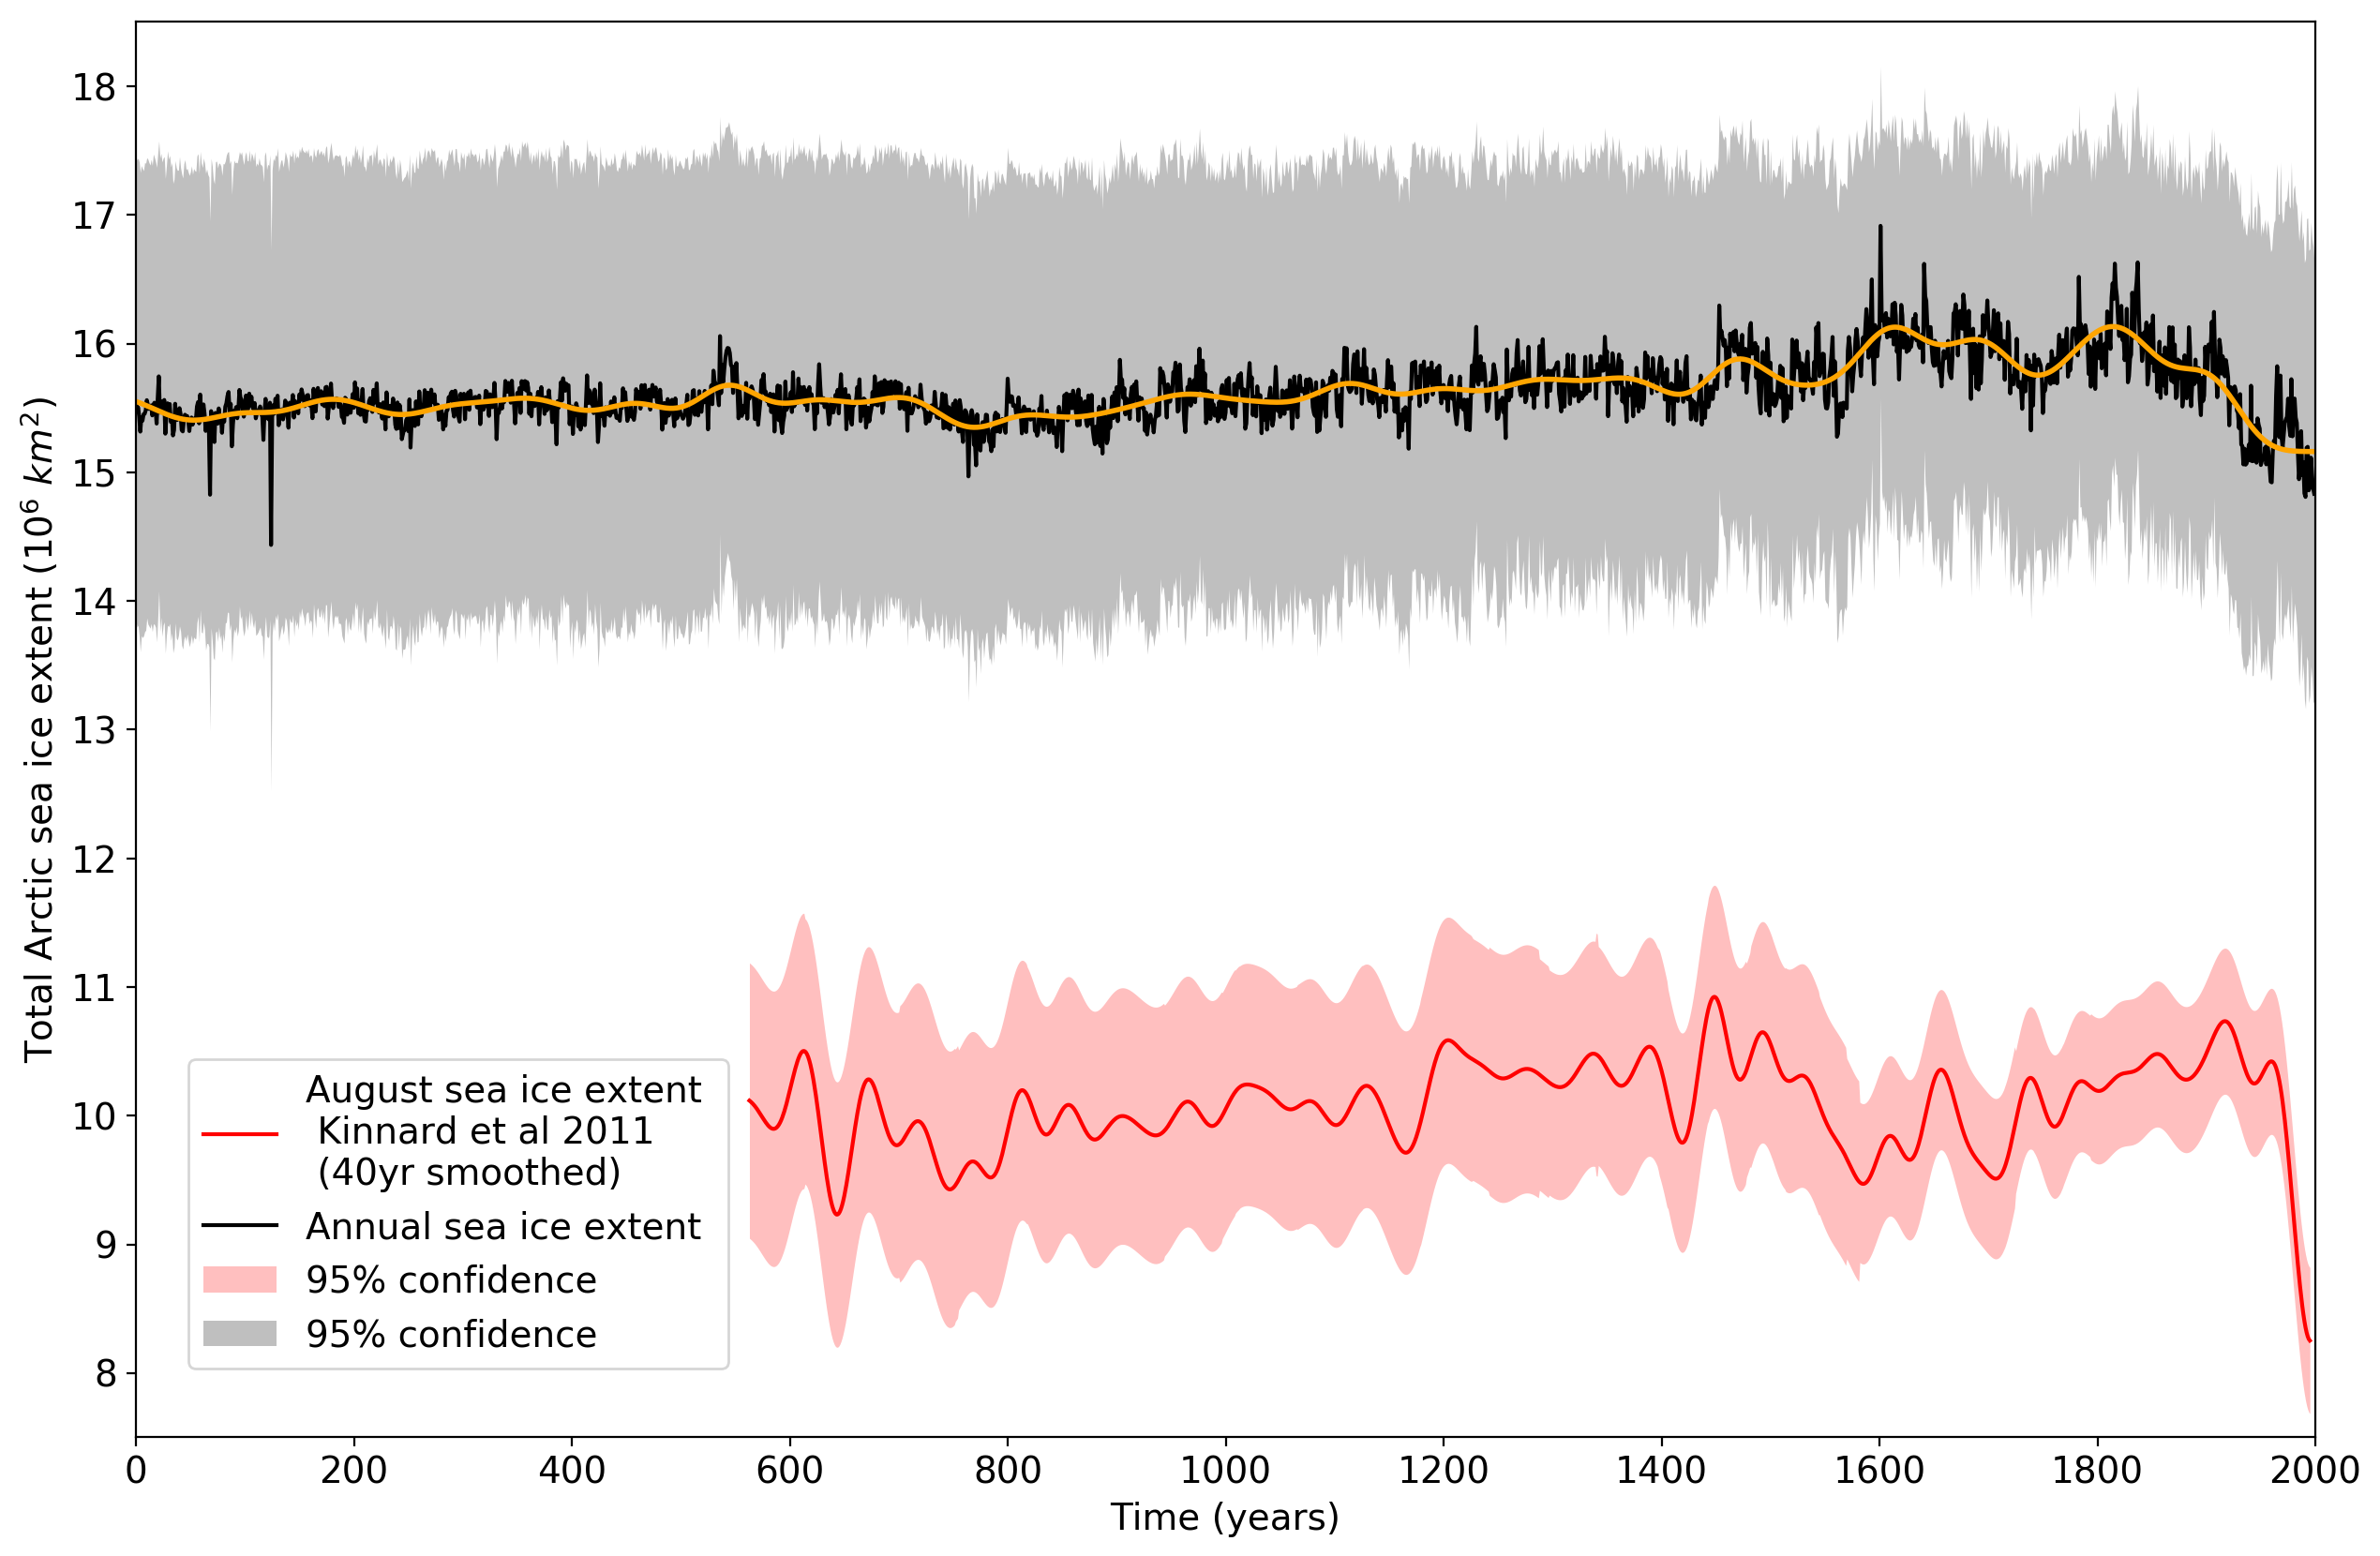

In [101]:
plt.subplots(figsize=(15,10))

plt.fill_between(df['year'],df['sie_recon_upper_95']/1000000,
                 df['sie_recon_lower_95']/1000000,linewidth=0.0,
                 label='95% confidence', color='r',alpha=0.25)
plt.fill_between(np.array(recon_years),sie_97_5_allit_ccsm4_full,
                 sie_2_5_allit_ccsm4_full,linewidth=0.0,
                 label='95% confidence', color='k',alpha=0.25)
# plt.fill_between(np.array(recon_years),sie_ccsm4_975_filt20,
#                  sie_ccsm4_25_filt20,linewidth=0.0,
#                  label='95% confidence', color='k',alpha=0.25)
plt.plot(df['year'],df['Aug_sie_40yr_recon']/1000000,color='r',
         label='August sea ice extent \n Kinnard et al 2011 \n (40yr smoothed)')
plt.plot(np.array(recon_years),sie_ensmn_allit_ccsm4_full,color='k',
         label='Annual sea ice extent')
plt.plot(np.array(recon_years),sie_ccsm4_filt20,color='orange', linewidth=2)
#         label='Annual sea ice extent \n (40yr smoothed)', linewidth=2)

plt.xlabel('Time (years)', fontsize=14)
plt.ylabel('Total Arctic sea ice extent (10$^6$ $km^{2}$)', fontsize=14)
#plt.title('Total Arctic Sea Ice Extent', fontsize=16) 

plt.yticks(np.arange(8, 18.1, 1), fontsize=14)
plt.xticks(np.arange(0, 2010,200), fontsize=14)
plt.xlim(0,2000)
plt.ylim(7.5,18.5)

#plt.axvline(1999)

plt.legend(bbox_to_anchor=(0.28, 0.28), fontsize=14)

In [104]:
[ce_kin,corr_kin,_,_] = rrutils.find_ce_corr(df['Aug_sie_40yr_recon']/1000000, 
                                             sie_ccsm4_filt20,
                                             np.array(recon_years),
                                             df['year'],563,1995)
ce_kin,corr_kin

(-718.7146829634363, -0.22646686673081162)

In [105]:
[ce_kin,corr_kin,_,_] = rrutils.find_ce_corr(sie_ccsm4_filt20,
                                             df['Aug_sie_40yr_recon']/1000000,
                                             df['year'],
                                             np.array(recon_years),563,1995)
ce_kin,corr_kin

(-259.0433936302614, -0.22646686673081162)

In [116]:
gmt_slope = rrutils.find_trend(gmt_recon_itmn,np.array(recon_years),1000,1800)
gmt_slope

-6.591531887093517e-05

In [117]:
sie_slope = rrutils.find_trend(sie_ensmn_anom_allit_ccsm4,np.array(recon_years),800,1800)
sie_slope

0.000526176919114922

In [111]:
from mtspec import mtspec
from mtspec.util import _load_mtdata

# Calculate the spectral estimation.
results_sie = mtspec(data=sie_ensmn_anom_allit_ccsm4, delta=1.0,time_bandwidth=3,statistics=False)
results_tas = mtspec(data=gmt_recon_itmn, delta=1.0,time_bandwidth=3,statistics=False)

power_sie, freq_sie = results_sie[:2]
power_sie = power[1:]
freq_sie = freq[1:]

power_tas, freq_tas = results_tas[:2]
power_tas = power_tas[1:]
freq_tas = freq_tas[1:]

Text(0,0.5,'Power Spectral Density ($K^2/yr$)')

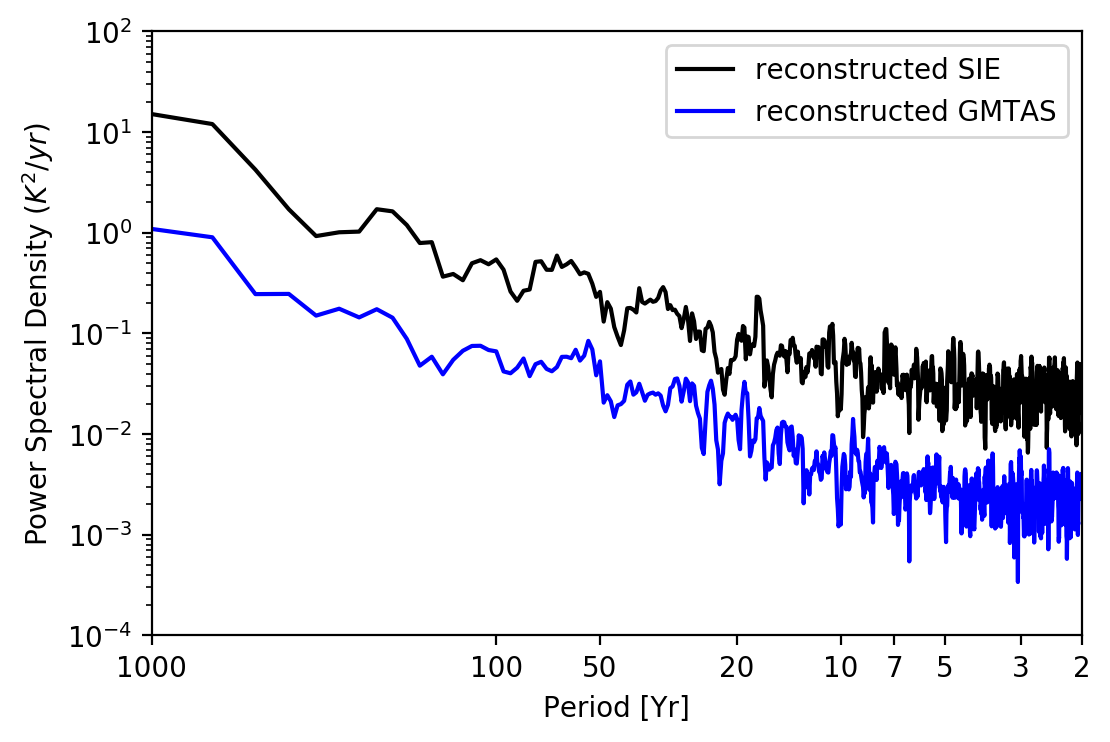

In [112]:
import matplotlib as mpl

fig, ax = plt.subplots()

ax.loglog(freq_sie, power_sie, color='black', label='reconstructed SIE')#, zorder=0, label='CCSM4')
ax.loglog(freq_tas, power_tas, color='b', label='reconstructed GMTAS')#, zorder=0, label='CCSM4')

ticks = 1/np.array([2,3,5,7,10, 20, 50, 100, 1000])
tick_labels = ['2','3','5','7','10', '20', '50', '100', '1000'][::-1]
ticks = ticks[::-1]
ax.set_xticks(ticks)
ax.set_xticklabels(tick_labels)
ax.get_xaxis().set_minor_locator(mpl.ticker.NullLocator())

plt.legend()
plt.xlim(1/1000,1/2)
plt.ylim(0.00001E1, 1E2)
plt.xlabel("Period [Yr]")
plt.ylabel("Power Spectral Density ($K^2/yr$)")

In [28]:
sie_ensmn_anom_allit_ccsm4.shape

(2000,)

In [50]:
grid = load_recon_grid()
grid.lat.shape

(91, 180)

In [51]:
sys.path.insert(1,'/home/disk/kalman2/mkb22/LMR_lite/')
import LMR_utils 

gmt_recon = np.zeros((2000,10))

for it in range(10):
    gmt_recon[:,it],_,_ = LMR_utils.global_hemispheric_means(tas_lalo_allit_ccsm4[:,:,:,it],grid.lat[:,0])
    
gmt_recon_itmn = np.nanmean(gmt_recon,axis=1)

(array([7.19687492e-01, 3.61761106e-01, 1.68173059e-02, 1.00737001e-02,
        8.83729290e-03, 1.03730559e-02, 9.98824565e-03, 1.38448725e-02,
        1.23574215e-02, 1.05967579e-02, 6.31985993e-03, 3.92828986e-03,
        3.63629406e-03, 9.29397544e-03, 7.95165715e-03, 4.14991161e-03,
        1.54933003e-03, 6.22447078e-04, 2.32042743e-03, 3.48708809e-03,
        1.38875488e-03, 1.18158891e-03, 1.71588040e-03, 1.85635344e-03,
        2.57075972e-03, 1.07066875e-03, 4.92089122e-04, 1.79690599e-03,
        3.12889279e-03, 1.70461503e-03, 1.62951462e-03, 1.03718659e-03,
        1.43080125e-03, 2.31858426e-03, 3.02061957e-03, 2.37765028e-03,
        1.21349301e-03, 1.21466864e-03, 5.32919756e-04, 5.16812724e-04,
        4.07894559e-04, 1.05816412e-03, 6.99357383e-04, 1.24505248e-03,
        1.57558179e-03, 9.42130975e-04, 1.34217638e-03, 1.24677379e-03,
        1.10037791e-03, 1.67907841e-03, 1.17797054e-03, 6.29800655e-04,
        6.38579626e-04, 5.70844477e-04, 8.62833977e-04, 7.383500

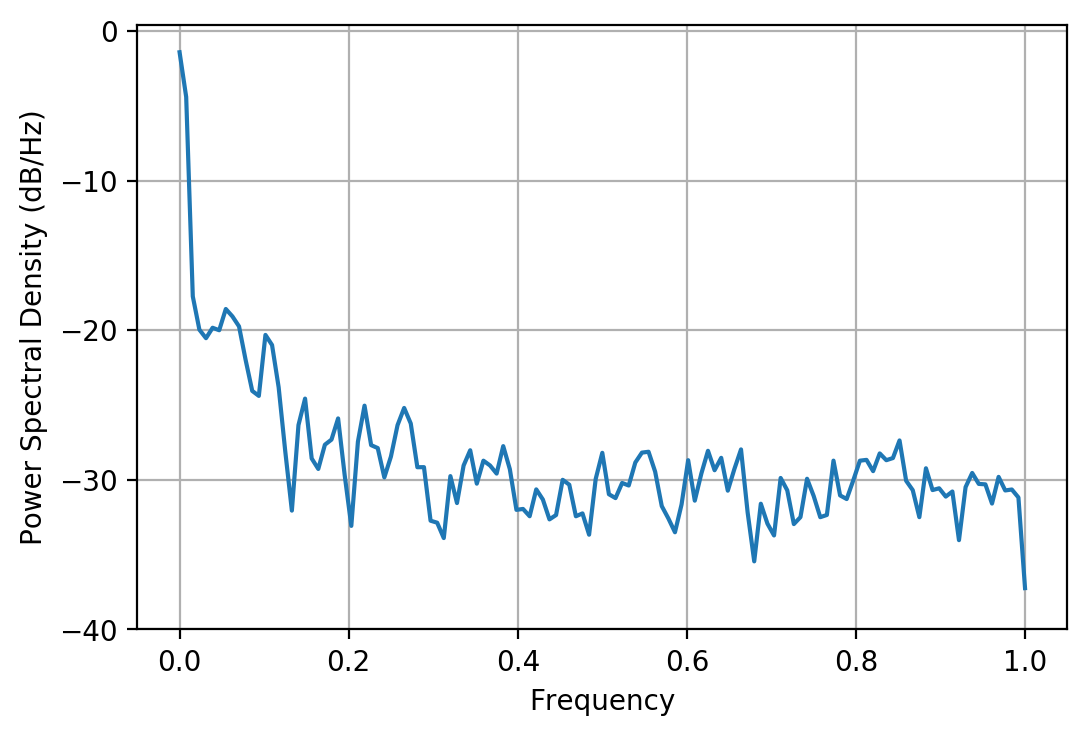

In [45]:
plt.psd(gmt_recon_itmn)

(array([2.57059036e+01, 1.33508623e+01, 9.12061461e-02, 1.41677808e-01,
        1.50684959e-01, 1.03121929e-01, 8.56566860e-02, 1.27796885e-01,
        1.05050230e-01, 7.11746982e-02, 4.63407105e-02, 2.96908345e-02,
        2.31364284e-02, 5.24549156e-02, 4.52516828e-02, 4.01822637e-02,
        1.50165201e-02, 1.17798707e-02, 1.59069126e-02, 3.92872553e-02,
        1.93980053e-02, 1.90961048e-02, 1.71447442e-02, 2.46994539e-02,
        3.94816832e-02, 1.77773292e-02, 2.04852949e-02, 4.46744029e-02,
        4.08116244e-02, 2.25706912e-02, 1.38811023e-02, 1.23059371e-02,
        1.46852322e-02, 1.49325790e-02, 2.23331526e-02, 3.33660731e-02,
        2.63943310e-02, 2.43821412e-02, 1.01447587e-02, 1.34450874e-02,
        9.19257662e-03, 1.77583632e-02, 1.49784153e-02, 1.42033298e-02,
        1.48537136e-02, 7.46052833e-03, 1.63870314e-02, 1.72404948e-02,
        1.25437365e-02, 8.69505938e-03, 1.23065305e-02, 5.67856602e-03,
        7.82721533e-03, 8.12496410e-03, 9.25445855e-03, 1.316142

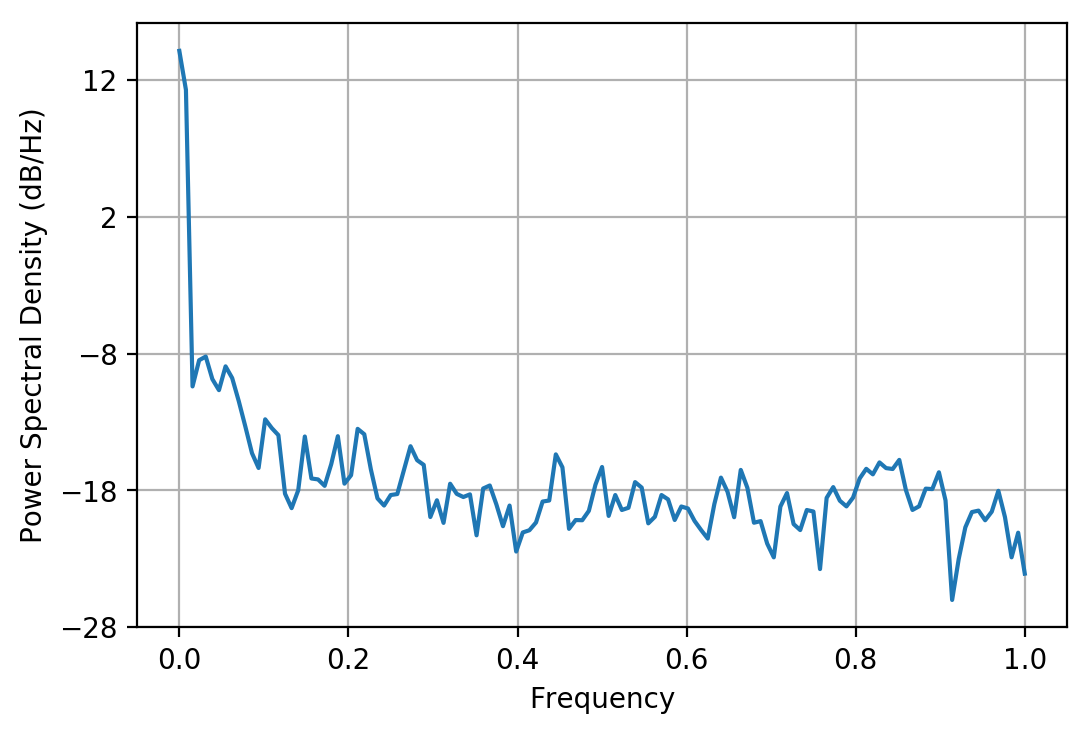

In [34]:
plt.psd(sie_ensmn_anom_allit_ccsm4)

(1840, 2000)

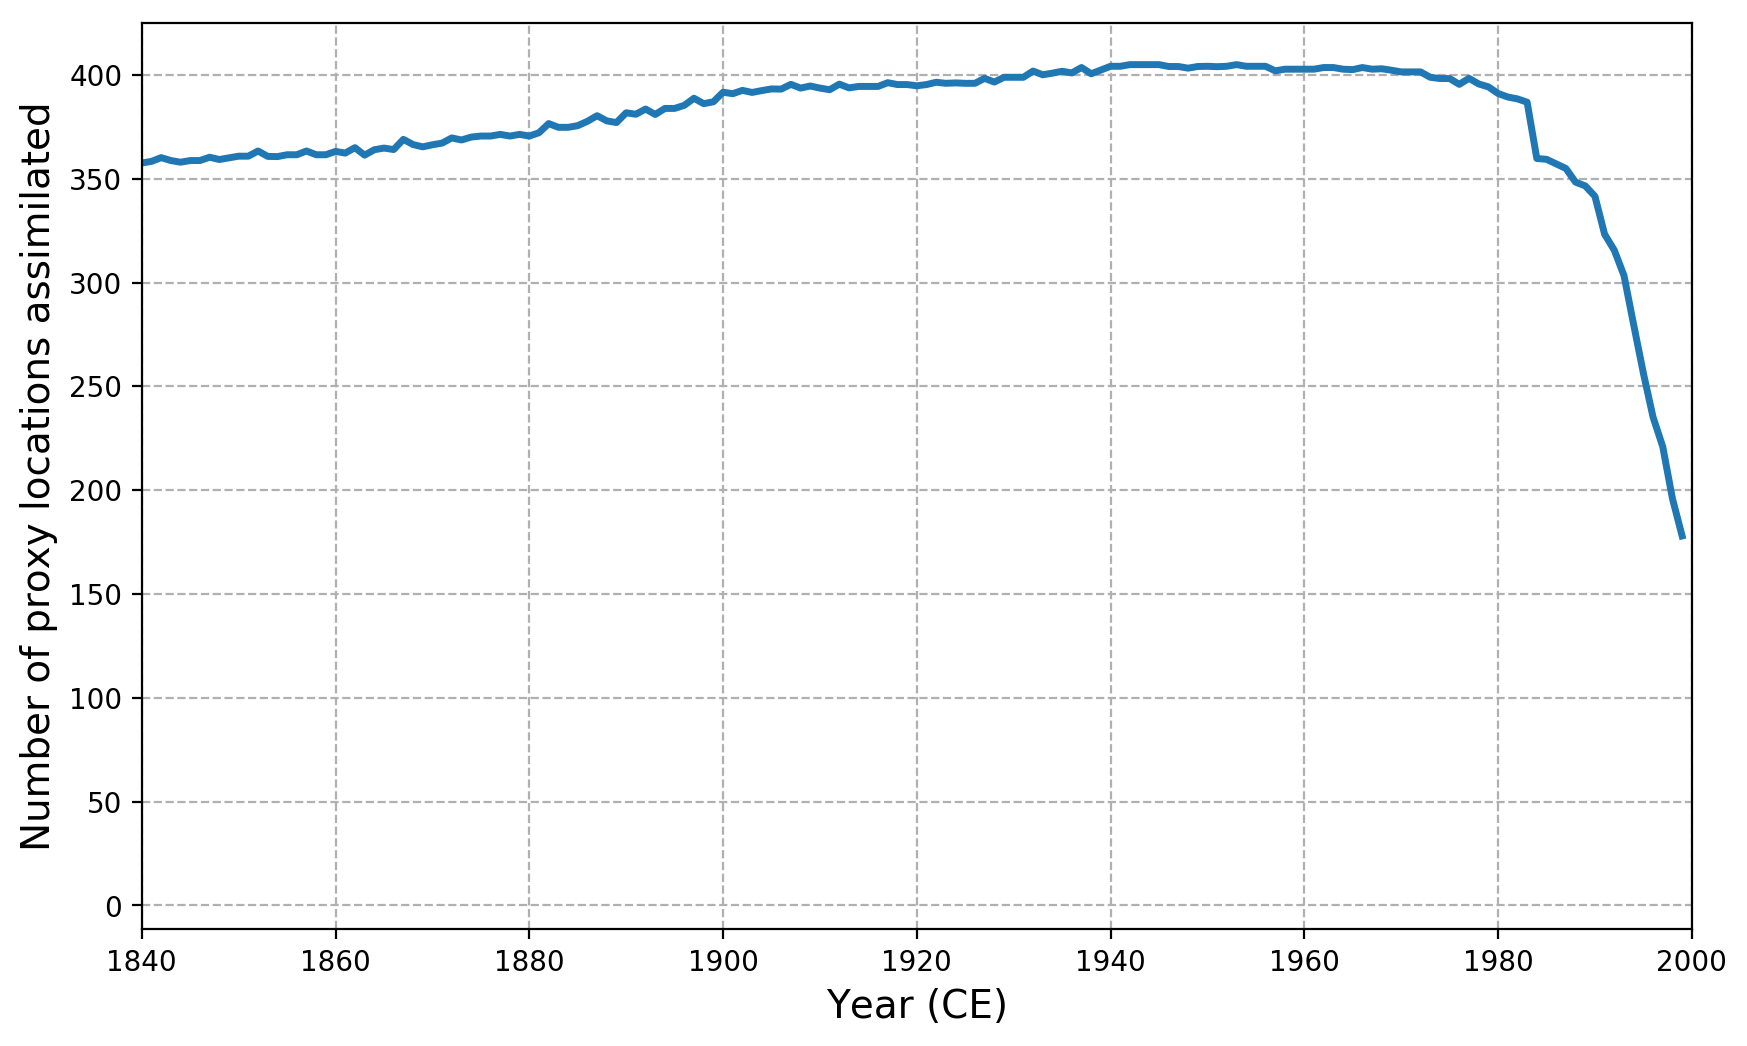

In [51]:
plt.figure(figsize=(10,6))
plt.plot(np.nanmean(nobs_allit_ccsm4,axis=1), linewidth=2.5)
#plt.plot(nobs_allit_mpi)

plt.xlabel('Year (CE)', fontsize=14)
plt.ylabel('Number of proxy locations assimilated', fontsize=14)
#plt.legend()
plt.grid(linestyle='--')

plt.xlim(1840,2000)

### Plotting Proxy Locations Assimilated: 

In [ ]:
prox_info = {'Tree Rings_WidthPages2':{'color':'g','label':'Tree Rings_WidthPages2'},
             'Tree Rings_WidthBreit':{'color':'lawngreen','label':'Tree Rings_WidthBreit'}, 
             'Tree Rings_WoodDensity':{'color':'mediumseagreen','label':'Tree Rings_WoodDensity'}, 
             'Tree Rings_Isotopes':{'color':'yellowgreen','label':'Tree Rings_Isotopes'}, 
             'Corals and Sclerosponges_d18O':{'color':'salmon','label':'Corals and Sclerosponges_d18O'},
             'Corals and Sclerosponges_SrCa':{'color':'orangered','label':'Corals and Sclerosponges_SrCa'}, 
             'Corals and Sclerosponges_Rates':{'color':'red','label':'Corals and Sclerosponges_Rates'}, 
             'Ice Cores_d18O':{'color':'lightskyblue','label':'Ice Cores_d18O'}, 
             'Ice Cores_dD':{'color':'aqua','label':'Ice Cores_dD'}, 
             'Ice Cores_Accumulation':{'color':'dodgerblue','label':'Ice Cores_Accumulation'}, 
             'Lake Cores_Varve':{'color':'brown','label':'Lake Cores_Varve'}, 
             'Lake Cores_Misc':{'color':'goldenrod','label':'Lake Cores_Misc'}, 
             'Bivalve_d18O':{'color':'darkorchid','label':'Bivalve_d18O'}}

In [ ]:
output_file_c

In [ ]:
# Plot assimilated proxies: Arctic 
nexp = proxy_assim_loc_allit_d['iter 0']
grid = load_recon_grid()

prox_present = nexp.keys()
nprox=0
for loc in prox_present: 
    nprox = nprox + nexp[loc]['lat'].shape[0]

handle_list = []
label_list = []

fig,ax = plt.subplots(1,1, figsize=(6, 6), subplot_kw = proj)
sub_arctic_plot(fig,ax,np.zeros((grid.nlat,grid.nlon)),
                grid.lat[:,0],grid.lon[0,:],
                'Assimilated proxy locations (total # = '+str(nprox)+')',
                1, colorbar=False)
for loc in prox_present: 
    ax.scatter([nexp[loc]['lon']],[nexp[loc]['lat']],
               color=prox_info[loc]['color'],transform=ccrs.PlateCarree(), 
               label=prox_info[loc]['label'], edgecolors='k',s=50)

handles, labels = ax.get_legend_handles_labels()
for handle, label in zip(handles, labels):
    if label not in label_list:
        handle_list.append(handle)
        label_list.append(label)
ax.legend(handle_list, label_list,bbox_to_anchor=(1.05, 0.8))

#fig.suptitle('SIC Truth vs Reconstruction: 1681-1850', fontsize=14)
#plt.tight_layout(rect=(0,0,1,0.93))

# savedir = '/home/disk/p/mkb22/Documents/si_analysis_kb/common_era_experiments/analysis/figures/sic_ccsm4_anrecon_0_2000_fullLMRdbv1_1_inf2_6_loc15000_a/'
# savename = 'assim_proxies_arc_2090.png'
# plt.savefig(savedir+savename)

In [ ]:
# Plot assimilated proxies: Global 
nexp = proxy_assim_loc_allit_d['iter 0']
grid = load_recon_grid()

handle_list = []
label_list = []

prox_present = nexp.keys()
nprox=0
for loc in prox_present: 
    nprox = nprox + nexp[loc]['lat'].shape[0]

fig,ax = plt.subplots(1,1, figsize=(8,6), subplot_kw = dict(projection=ccrs.Robinson()))
sub_arctic_plot(fig,ax,np.zeros((grid.nlat,grid.nlon)),
                grid.lat[:,0],grid.lon[0,:],
                'Assimilated proxy locations (total # = '+str(nprox)+')',1, 
                colorbar=False, extent=False)
for loc in prox_present: 
    ax.scatter([nexp[loc]['lon']],[nexp[loc]['lat']],
               color=prox_info[loc]['color'],transform=ccrs.PlateCarree(), 
               label=prox_info[loc]['label'], edgecolors='k',s=50)

handles, labels = ax.get_legend_handles_labels()
for handle, label in zip(handles, labels):
    if label not in label_list:
        handle_list.append(handle)
        label_list.append(label)
ax.legend(handle_list, label_list,bbox_to_anchor=(1.05, 0.8))

# savedir = '/home/disk/p/mkb22/Documents/si_analysis_kb/common_era_experiments/analysis/figures/sic_ccsm4_anrecon_0_2000_fullLMRdbv1_1_inf2_6_loc15000_a/'
# savename = 'assim_proxies_global_2090.png'
# plt.savefig(savedir+savename)